In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
datos

title  \
0     Electromagnetic neutrinos in laboratory experi...   
1     Infrared complex refractive index of astrophys...   
2                Gamma-ray lines in modern astrophysics   
3     From Coulomb excitation cross sections to non-...   
4     Astrophysical Black Holes: A Compact Pedagogic...   
...                                                 ...   
7745            Superconducting LaAlO3/SrTiO3 Nanowires   
7746  Coupling a single Nitrogen-Vacancy center to a...   
7747  Superconducting and Anti-Ferromagnetic Phases ...   
7748  New Superconductivity Dome in LaFeAsO$_{1-x}$F...   
7749  A new formula for the energy of bulk supercond...   

                                               abstract        categorical  \
0     An overview of neutrino electromagnetic proper...       astrophysics   
1     In dense and cold regions of the interstellar ...       astrophysics   
2     Gamma-ray astronomy provides a direct window i...       astrophysics   
3     Coulomb and nuclear dissociation of $^{17}$Ne ...       astrophysics   
4     Black holes are among the most extreme objects...       astrophysics   
...                                                 ...                ...   
7745  Here's a rewritten version of the text using m...  superconductivity   
7746  Here's a rewritten version of the text in my o...  superconductivity   
7747  Here's a rewritten version of the text using m...  superconductivity   
7748  Here's the rewritten text:\n\nA fascinating ph...  superconductivity   
7749  Here's a rewritten version with my own words:\...  superconductivity   

     categoria      cat_one_hot  \
0       humano  [1, 0, 0, 0, 0]   
1       humano  [1, 0, 0, 0, 0]   
2       humano  [1, 0, 0, 0, 0]   
3       humano  [1, 0, 0, 0, 0]   
4       humano  [1, 0, 0, 0, 0]   
...        ...              ...   
7745    llama3  [0, 0, 0, 0, 1]   
7746    llama3  [0, 0, 0, 0, 1]   
7747    llama3  [0, 0, 0, 0, 1]   
7748    llama3  [0, 0, 0, 0, 1]   
7749    llama3  [0, 0, 0, 0, 1]   

                                        abstract_limpio  \
0     An overview of neutrino electromagnetic proper...   
1     In dense and cold regions of the interstellar ...   
2     Gamma-ray astronomy provides a direct window i...   
3     Coulomb and nuclear dissociation of $^{17}$Ne ...   
4     Black holes are among the most extreme objects...   
...                                                 ...   
7745  \n\nWe've achieved a groundbreaking breakthrou...   
7746  \n\nWe propose a groundbreaking idea: connecti...   
7747  \n\nThis study establishes a connection betwee...   
7748  Here's the rewritten text:\n\nA fascinating ph...   
7749  \n\n"In the presence of an external magnetic f...   

                                  abstract_preprocesado  
0     ['overview', 'neutrino', 'electromagnetic', 'p...  
1     ['dense', 'cold', 'region', 'interstellar', 'm...  
2     ['gamma-ray', 'astronomy', 'provides', 'direct...  
3     ['coulomb', 'nuclear', 'dissociation', 'ne', '...  
4     ['black', 'hole', 'among', 'extreme', 'object'...  
...                                                 ...  
7745  ["'ve", 'achieved', 'groundbreaking', 'breakth...  
7746  ['propose', 'groundbreaking', 'idea', 'connect...  
7747  ['study', 'establishes', 'connection', 'two', ...  
7748  ["'s", 'rewritten', 'text', 'fascinating', 'ph...  
7749  ['presence', 'external', 'magnetic', 'field', ...  

[7750 rows x 7 columns]

In [11]:
texto_preprocesado = datos['abstract_preprocesado'].tolist()
lista_de_listas = [eval(cadena) for cadena in texto_preprocesado]

print(len(lista_de_listas))
print(type(lista_de_listas[0]))

7750
<class 'list'>


In [12]:
def generar_n_gramas(tokens, n):
    n_gramas = ngrams(tokens, n)
    return list(n_gramas)
    
def calculo_de_n_gramas(texto):
    #print(f"este es el texto: {type(texto)}")
    unigramas_limpios = []
    texto = eval(texto)
    # Calculo de unigramas limpios
    unigramas = generar_n_gramas(texto, 1)
    for uni in unigramas:
        unigramas_limpios.append(uni[0])
    #print(f"Unigramas: {unigramas}")
    
    bigramas_limpios = []
    bigramas = generar_n_gramas(texto, 2)
    for big in bigramas:
        bigrama_final = str(big[0]) + " " + str(big[1])
        bigramas_limpios.append(bigrama_final)
        
    #print(f"Bigramas: {bigramas}")
    #trigramas = generar_n_gramas(texto, 3)
    #print(f"Tirgramas: {trigramas}")
    n_gramas = unigramas_limpios + bigramas_limpios
    return n_gramas

def obtener_vocabulario(lista_n_gramas):
    vocabulario = set()
    for lista in lista_n_gramas:
        for token in lista:
            vocabulario.add(token)
    return vocabulario

In [13]:
from nltk.util import ngrams

lista_n_gramas = []

i = 0

for texto_tokens in texto_preprocesado:
        retorno = calculo_de_n_gramas(texto_tokens)
        lista_n_gramas.append(retorno)


In [14]:
vocabulario = obtener_vocabulario(lista_n_gramas)
print(len(vocabulario))
vocabulario = list(vocabulario)

277702


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convertir la lista de listas de tokens a una lista de textos
textos = [' '.join(lista) for lista in lista_de_listas]

# Inicializar el vectorizador TF-IDF
vectorizador = TfidfVectorizer(vocabulary=vocabulario)

# Aplicar TF-IDF a los textos
tfidf_matrix = vectorizador.fit_transform(textos)

# Obtener la matriz TF-IDF como una matriz densa
tfidf_matrix_dense = tfidf_matrix.todense()

print("Matriz TF-IDF:")
print(tfidf_matrix_dense)
dimensiones = tfidf_matrix.shape
# Dimensiones devuelve una tupla (número de filas, número de columnas)
numero_filas = dimensiones[0]
numero_columnas = dimensiones[1]
print("Número de filas:", numero_filas)
print("Número de columnas:", numero_columnas)
df_tfidf = pd.DataFrame(tfidf_matrix_dense, columns=vocabulario)

F:\nuevo_conocimiento\gpu_cuda\Lib\site-packages\sklearn\feature_extraction\text.py:1381: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


Matriz TF-IDF:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Número de filas: 7750
Número de columnas: 277702


In [16]:
df_etiquetas = datos['cat_one_hot']
df_junto = pd.concat([df_tfidf, df_etiquetas], axis=1)
df_junto


revealed many  report displacement  three string  thus scope  form dust  \
0               0.0                  0.0           0.0         0.0        0.0   
1               0.0                  0.0           0.0         0.0        0.0   
2               0.0                  0.0           0.0         0.0        0.0   
3               0.0                  0.0           0.0         0.0        0.0   
4               0.0                  0.0           0.0         0.0        0.0   
...             ...                  ...           ...         ...        ...   
7745            0.0                  0.0           0.0         0.0        0.0   
7746            0.0                  0.0           0.0         0.0        0.0   
7747            0.0                  0.0           0.0         0.0        0.0   
7748            0.0                  0.0           0.0         0.0        0.0   
7749            0.0                  0.0           0.0         0.0        0.0   

      rate-limited fermilab  relying powerful  nucleation generalise  \
0                       0.0               0.0                    0.0   
1                       0.0               0.0                    0.0   
2                       0.0               0.0                    0.0   
3                       0.0               0.0                    0.0   
4                       0.0               0.0                    0.0   
...                     ...               ...                    ...   
7745                    0.0               0.0                    0.0   
7746                    0.0               0.0                    0.0   
7747                    0.0               0.0                    0.0   
7748                    0.0               0.0                    0.0   
7749                    0.0               0.0                    0.0   

      interaction included  ordered quadrupolar  ...  commonly  distinct much  \
0                      0.0                  0.0  ...       0.0            0.0   
1                      0.0                  0.0  ...       0.0            0.0   
2                      0.0                  0.0  ...       0.0            0.0   
3                      0.0                  0.0  ...       0.0            0.0   
4                      0.0                  0.0  ...       0.0            0.0   
...                    ...                  ...  ...       ...            ...   
7745                   0.0                  0.0  ...       0.0            0.0   
7746                   0.0                  0.0  ...       0.0            0.0   
7747                   0.0                  0.0  ...       0.0            0.0   
7748                   0.0                  0.0  ...       0.0            0.0   
7749                   0.0                  0.0  ...       0.0            0.0   

      made mixture  doe include  many value  study chain  rise  contingent  \
0              0.0          0.0         0.0          0.0   0.0         0.0   
1              0.0          0.0         0.0          0.0   0.0         0.0   
2              0.0          0.0         0.0          0.0   0.0         0.0   
3              0.0          0.0         0.0          0.0   0.0         0.0   
4              0.0          0.0         0.0          0.0   0.0         0.0   
...            ...          ...         ...          ...   ...         ...   
7745           0.0          0.0         0.0          0.0   0.0         0.0   
7746           0.0          0.0         0.0          0.0   0.0         0.0   
7747           0.0          0.0         0.0          0.0   0.0         0.0   
7748           0.0          0.0         0.0          0.0   0.0         0.0   
7749           0.0          0.0         0.0          0.0   0.0         0.0   

      c z^0      cat_one_hot  
0       0.0  [1, 0, 0, 0, 0]  
1       0.0  [1, 0, 0, 0, 0]  
2       0.0  [1, 0, 0, 0, 0]  
3       0.0  [1, 0, 0, 0, 0]  
4       0.0  [1, 0, 0, 0, 0]  
...     ...              ...  
7745    0.0  [0, 0, 0, 0, 1]  
7746    0.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [23]:
def random_forest_classification(dataset,n_estimators,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Entrenar el modelo de regresión logística
        modelo_random_forest.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_random_forest.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_sim_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_random_forest = RandomForestClassifier(n_estimators=n_estimators)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_random_forest, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        direccion_nueva_carpeta = "Random_Forest_val_cruz_" + str(n_estimators) + "_estimators"
        ruta_figura_incom = crear_directorio(direccion_nueva_carpeta)
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/random_forest_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_random_forest, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.1.png


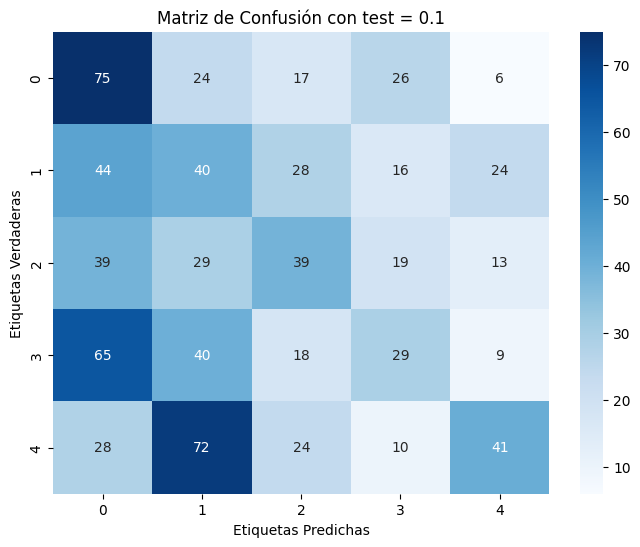

Exactitud del modelo: 0.28903225806451616
Precisión del modelo: 0.3106399887913614
Recall del modelo: 0.28903225806451616
Puntuación F1 del modelo: 0.28378901140460827
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.2.png


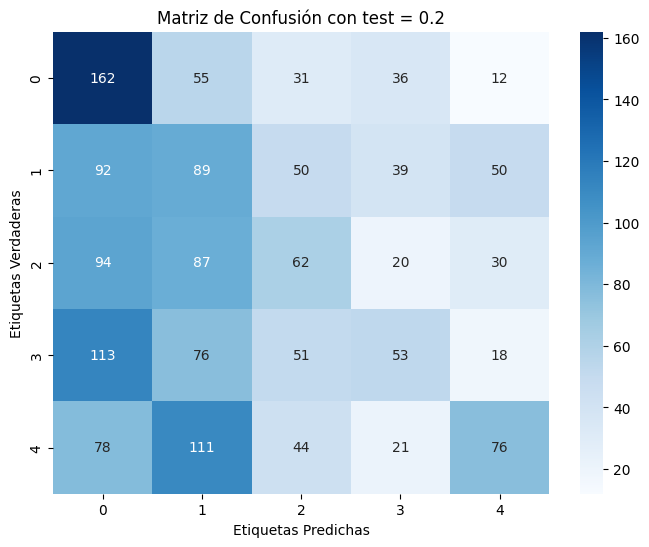

Exactitud del modelo: 0.28516129032258064
Precisión del modelo: 0.3005146490171605
Recall del modelo: 0.28516129032258064
Puntuación F1 del modelo: 0.2750625652920732
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.3.png


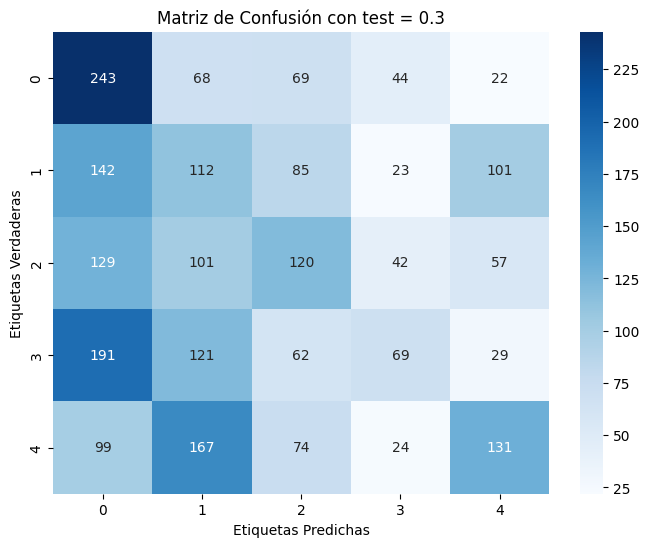

Exactitud del modelo: 0.2903225806451613
Precisión del modelo: 0.3050738829025417
Recall del modelo: 0.2903225806451613
Puntuación F1 del modelo: 0.28013222986306086
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.4.png


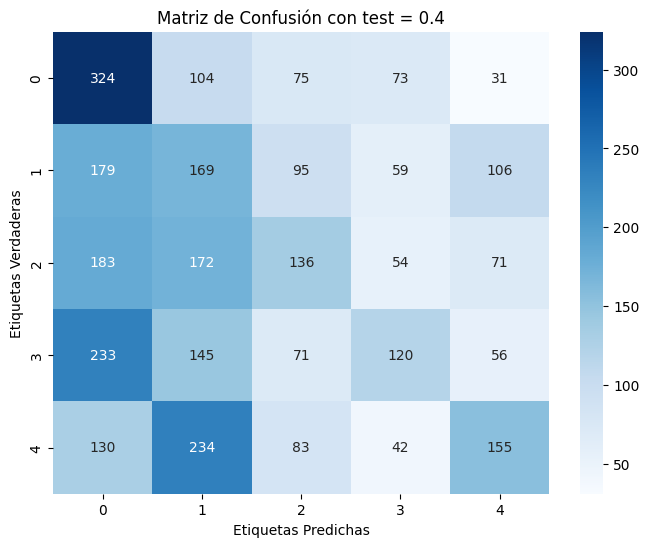

Exactitud del modelo: 0.29161290322580646
Precisión del modelo: 0.3058236486187899
Recall del modelo: 0.29161290322580646
Puntuación F1 del modelo: 0.2834574405891342
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.5.png


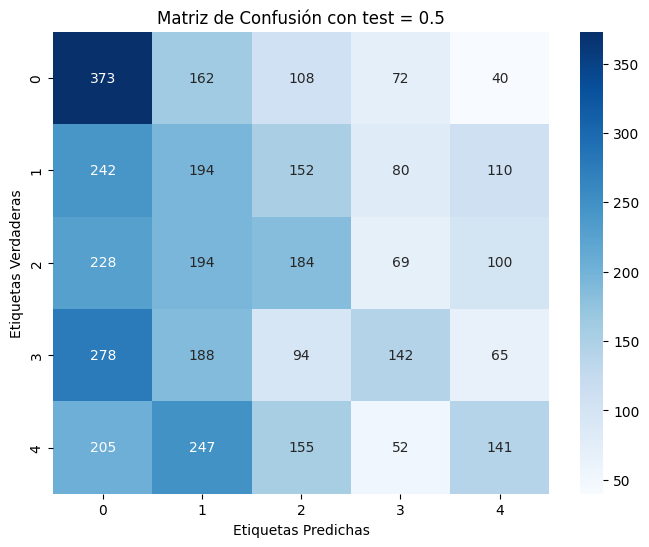

Exactitud del modelo: 0.26683870967741935
Precisión del modelo: 0.27901770155389155
Recall del modelo: 0.26683870967741935
Puntuación F1 del modelo: 0.25807967086843187
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.6.png


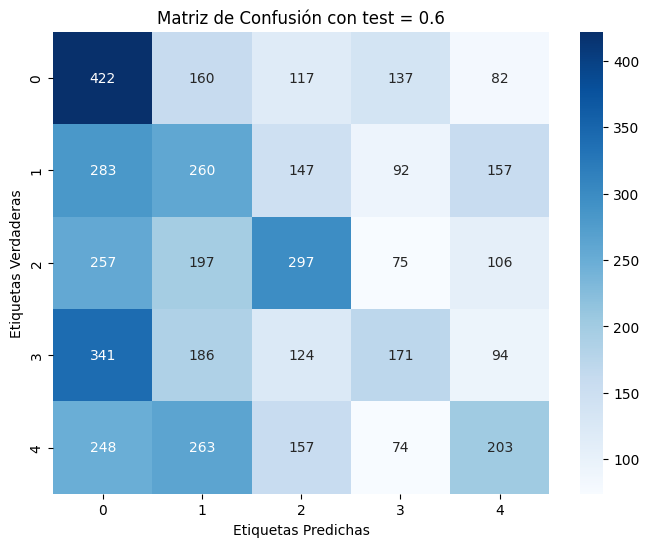

Exactitud del modelo: 0.29096774193548386
Precisión del modelo: 0.2992821247857709
Recall del modelo: 0.29096774193548386
Puntuación F1 del modelo: 0.2849467552564364
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.7.png


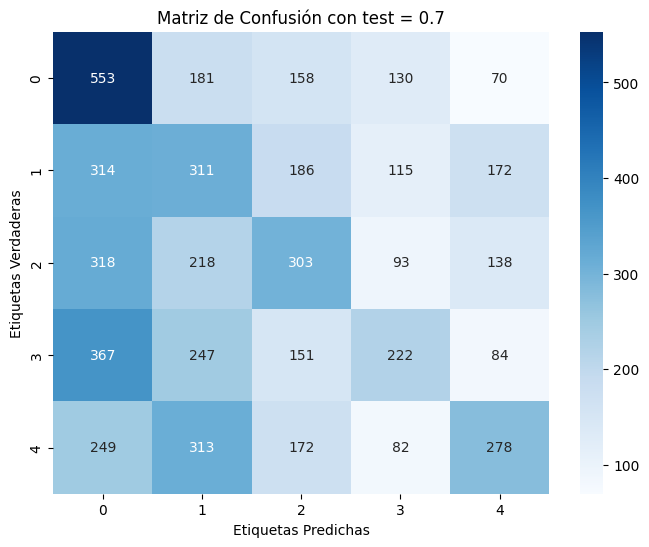

Exactitud del modelo: 0.3072811059907834
Precisión del modelo: 0.3168009240636729
Recall del modelo: 0.3072811059907834
Puntuación F1 del modelo: 0.30094617318280803
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.8.png


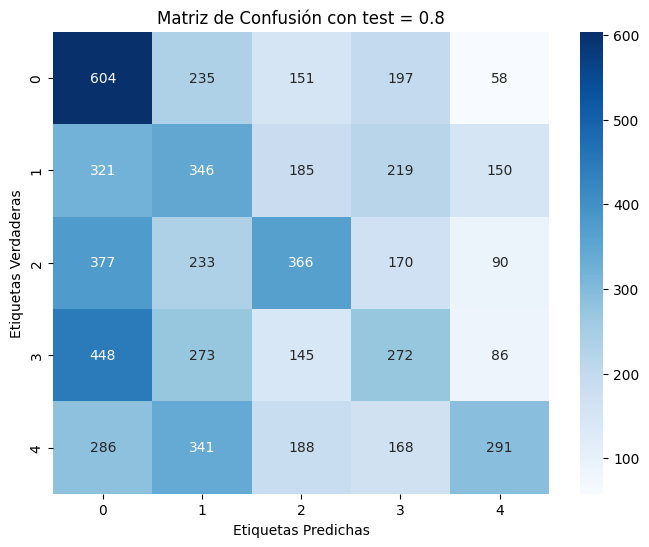

Exactitud del modelo: 0.30306451612903224
Precisión del modelo: 0.31870829501109227
Recall del modelo: 0.30306451612903224
Puntuación F1 del modelo: 0.2987277452157489
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/matriz_confusion_test_0.9.png


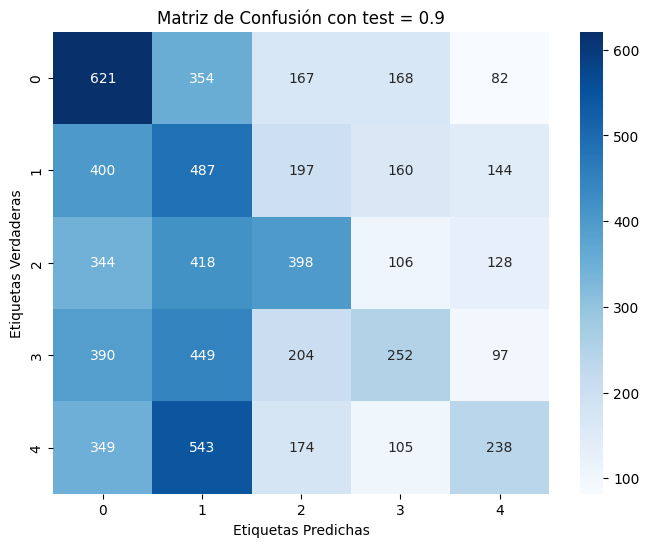

Exactitud del modelo: 0.2861648745519713
Precisión del modelo: 0.3050892658709441
Recall del modelo: 0.2861648745519713
Puntuación F1 del modelo: 0.2788505692657968
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_3_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_3_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_2.png


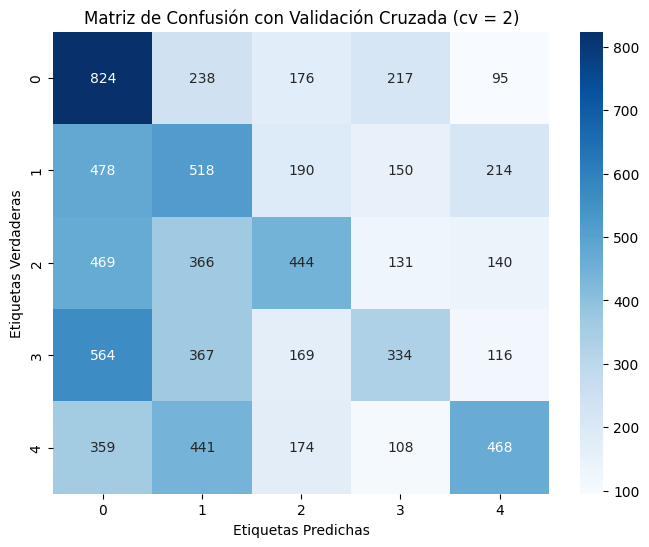

Exactitud media: 0.3339354838709677
Precisión media: 0.3535419161538493
Recall media: 0.3339354838709677
Puntuación F1 media: 0.3290360708991681
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_3.png


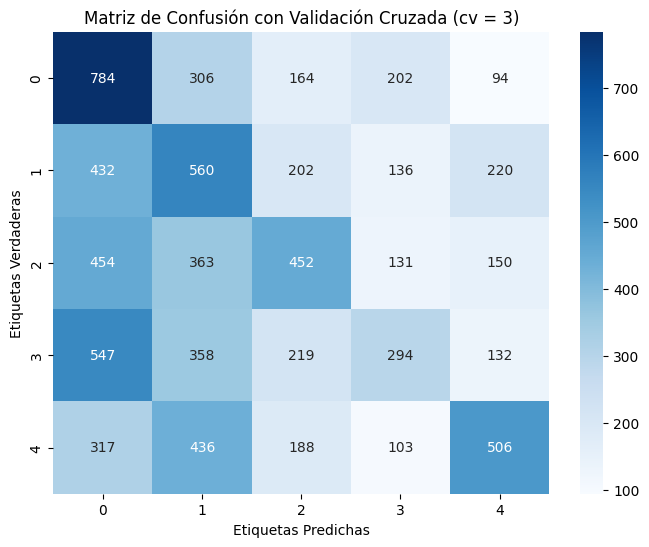

Exactitud media: 0.3349677419354839
Precisión media: 0.350769107430148
Recall media: 0.3349677419354839
Puntuación F1 media: 0.329628287123149
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_4.png


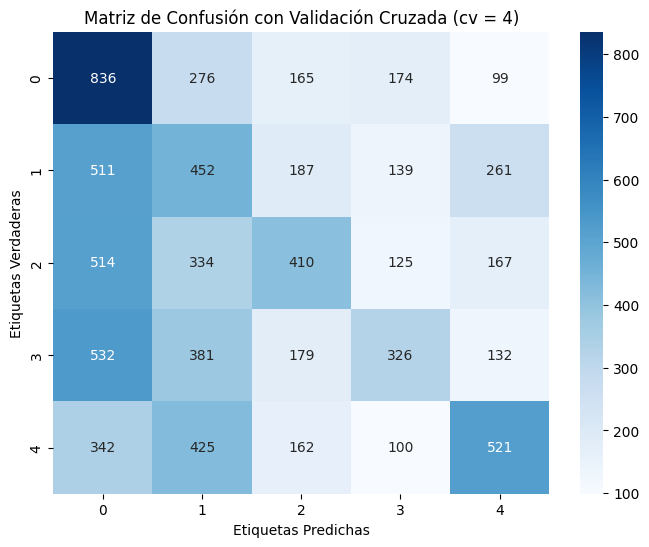

Exactitud media: 0.32838709677419353
Precisión media: 0.3476382089241934
Recall media: 0.32838709677419353
Puntuación F1 media: 0.32310813844337555
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_5.png


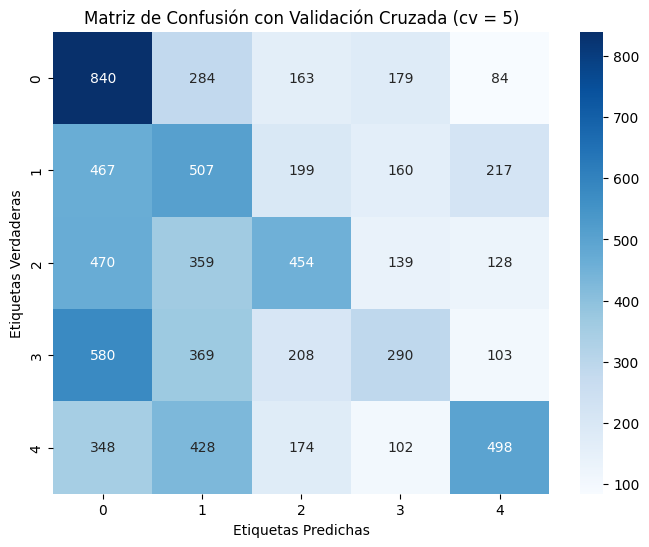

Exactitud media: 0.33406451612903226
Precisión media: 0.353346016245759
Recall media: 0.33406451612903226
Puntuación F1 media: 0.3281860991594376
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_6.png


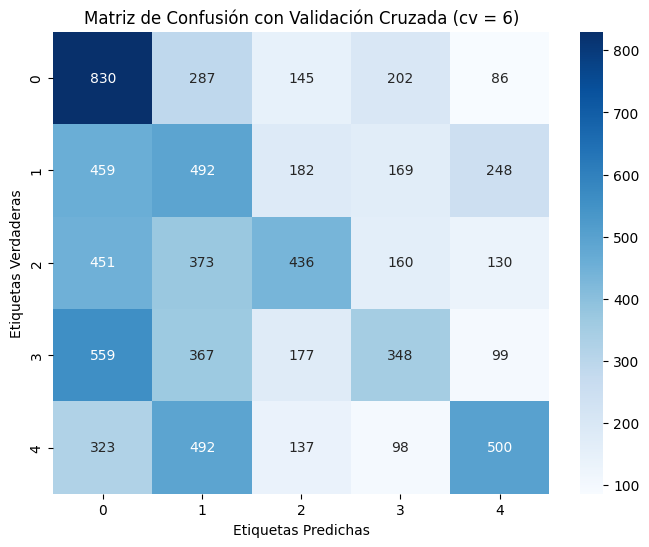

Exactitud media: 0.33625806451612905
Precisión media: 0.3585188379012044
Recall media: 0.33625806451612905
Puntuación F1 media: 0.3328564853220553
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_7.png


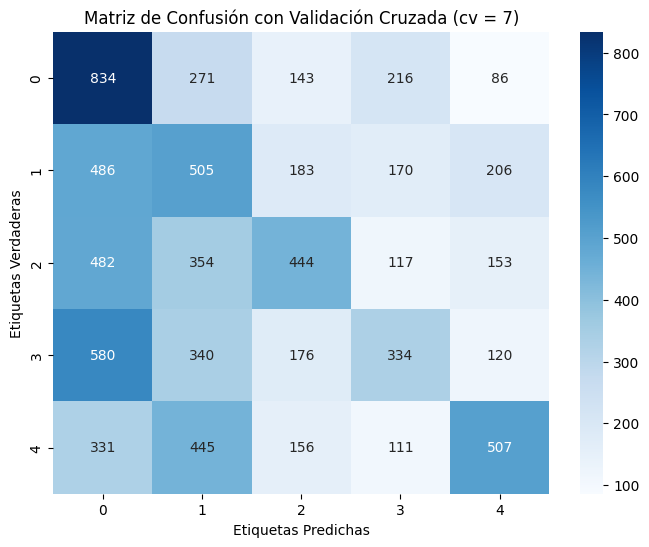

Exactitud media: 0.33858064516129033
Precisión media: 0.3598577183859668
Recall media: 0.33858064516129033
Puntuación F1 media: 0.33434865825146615
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_8.png


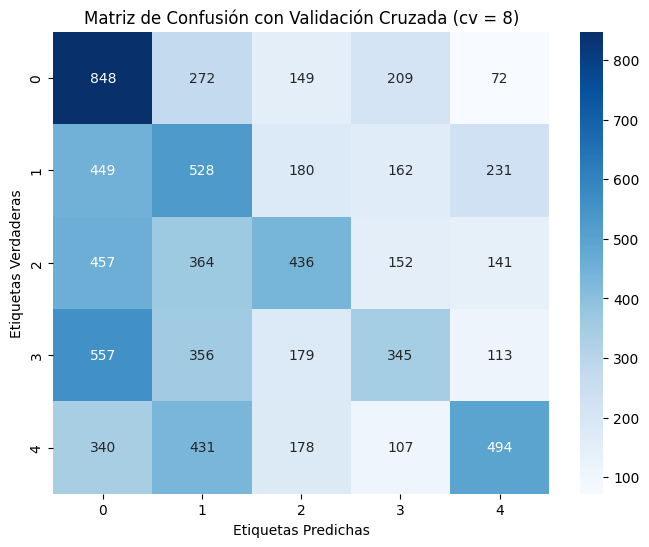

Exactitud media: 0.34206451612903227
Precisión media: 0.3605952470410104
Recall media: 0.34206451612903227
Puntuación F1 media: 0.3369620084587113
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_9.png


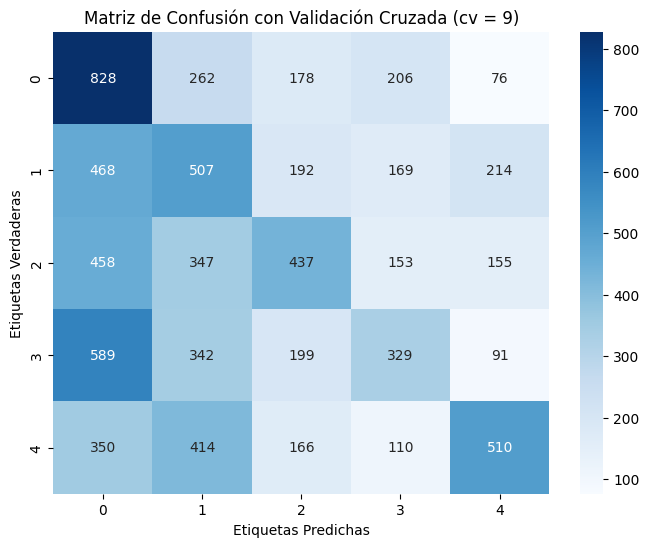

Exactitud media: 0.3369032258064516
Precisión media: 0.355792646406442
Recall media: 0.3369032258064516
Puntuación F1 media: 0.33240595368071074
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_3_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/matriz_confusion_cv_10.png


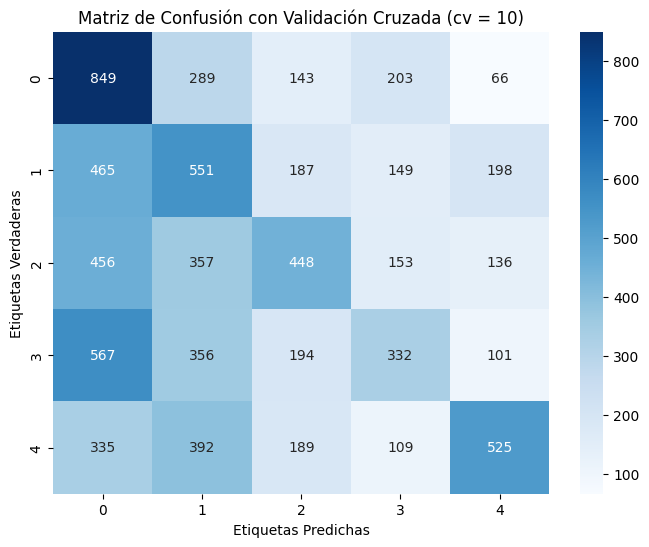

Exactitud media: 0.34903225806451615
Precisión media: 0.36991030727385193
Recall media: 0.34903225806451615
Puntuación F1 media: 0.34432526591478885
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_3_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.1.png


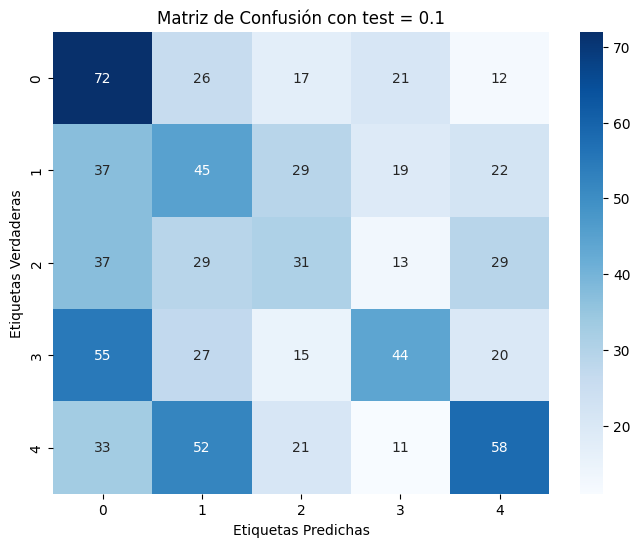

Exactitud del modelo: 0.3225806451612903
Precisión del modelo: 0.33478955303163377
Recall del modelo: 0.3225806451612903
Puntuación F1 del modelo: 0.3202941226595113
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.2.png


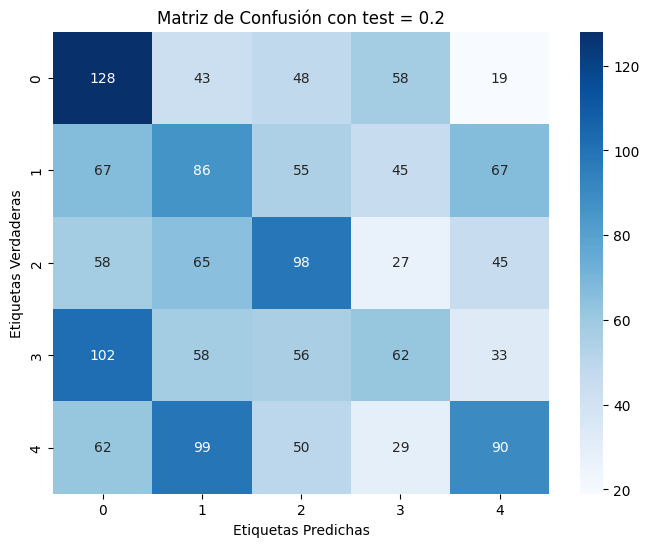

Exactitud del modelo: 0.29935483870967744
Precisión del modelo: 0.301272270229653
Recall del modelo: 0.29935483870967744
Puntuación F1 del modelo: 0.2956251028374829
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.3.png


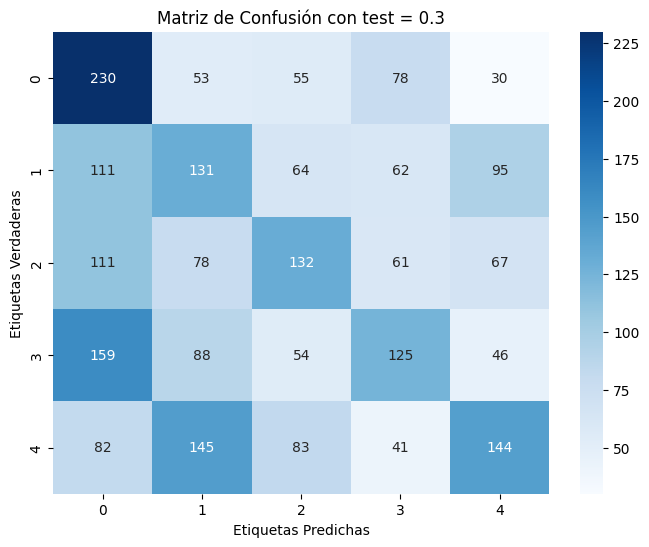

Exactitud del modelo: 0.327741935483871
Precisión del modelo: 0.33146958274925753
Recall del modelo: 0.327741935483871
Puntuación F1 del modelo: 0.3232537586743777
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.4.png


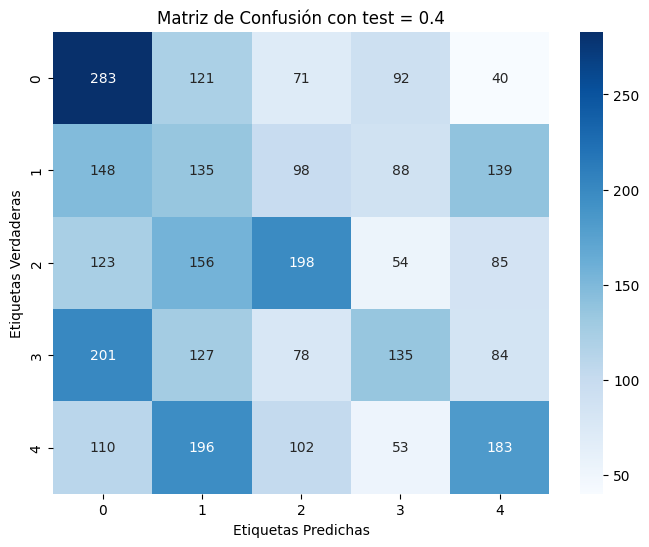

Exactitud del modelo: 0.30129032258064514
Precisión del modelo: 0.30810474708232116
Recall del modelo: 0.30129032258064514
Puntuación F1 del modelo: 0.29908162654191095
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.5.png


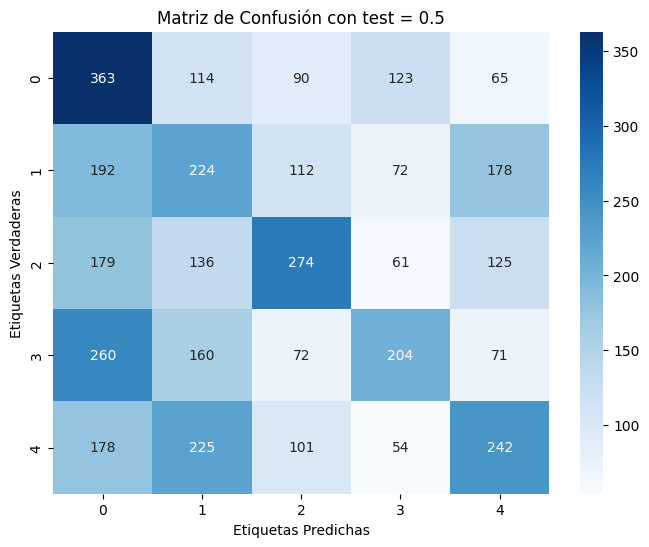

Exactitud del modelo: 0.3372903225806452
Precisión del modelo: 0.34906259885712937
Recall del modelo: 0.3372903225806452
Puntuación F1 del modelo: 0.3358305516231797
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.6.png


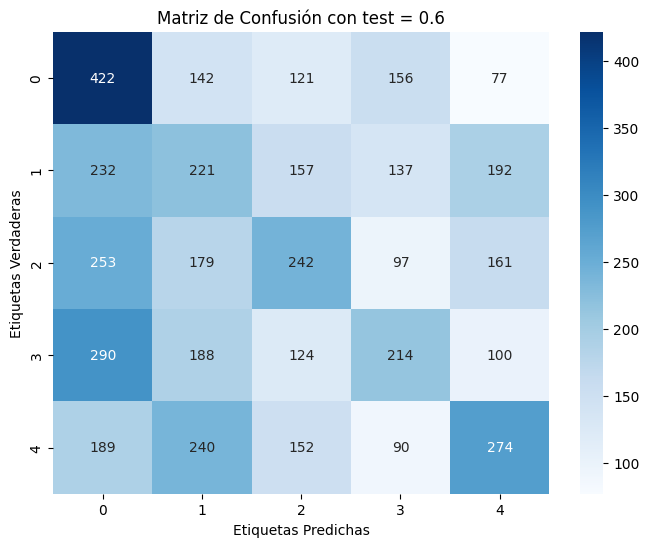

Exactitud del modelo: 0.2952688172043011
Precisión del modelo: 0.2970533141494561
Recall del modelo: 0.2952688172043011
Puntuación F1 del modelo: 0.29125505907809085
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.7.png


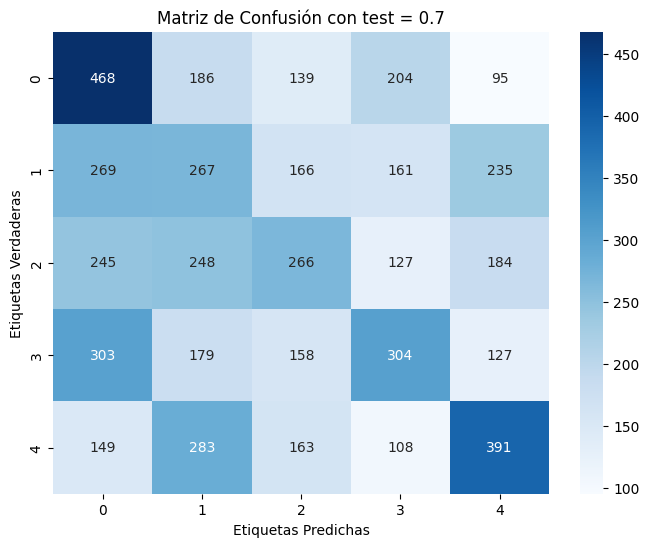

Exactitud del modelo: 0.3126267281105991
Precisión del modelo: 0.31376822910796454
Recall del modelo: 0.3126267281105991
Puntuación F1 del modelo: 0.3108205052086035
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.8.png


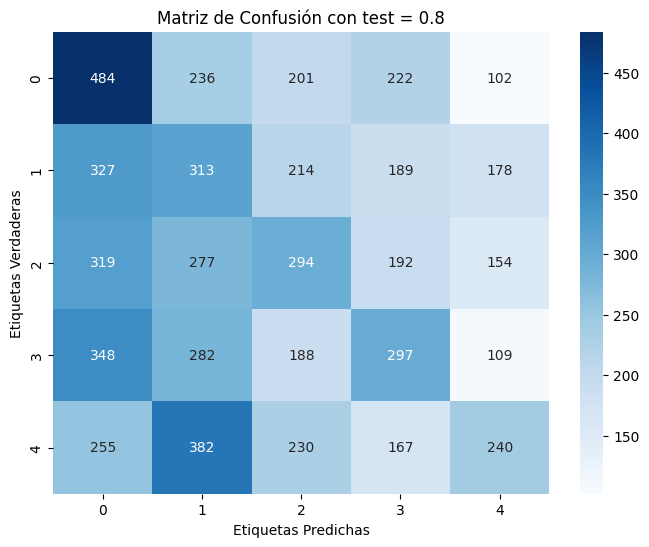

Exactitud del modelo: 0.2625806451612903
Precisión del modelo: 0.26739274499641275
Recall del modelo: 0.2625806451612903
Puntuación F1 del modelo: 0.2594890602140671
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/matriz_confusion_test_0.9.png


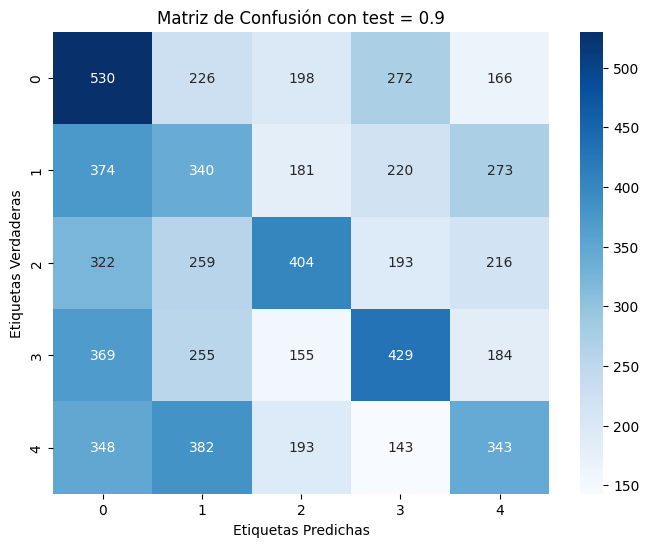

Exactitud del modelo: 0.29333333333333333
Precisión del modelo: 0.2988363595083098
Recall del modelo: 0.29333333333333333
Puntuación F1 del modelo: 0.29298928160862536
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_4_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_4_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_2.png


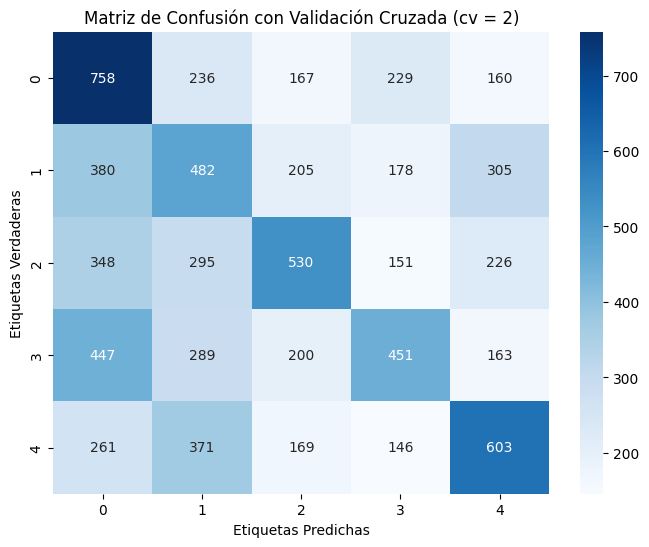

Exactitud media: 0.36438709677419356
Precisión media: 0.3709855362549848
Recall media: 0.36438709677419356
Puntuación F1 media: 0.3628577543153204
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_3.png


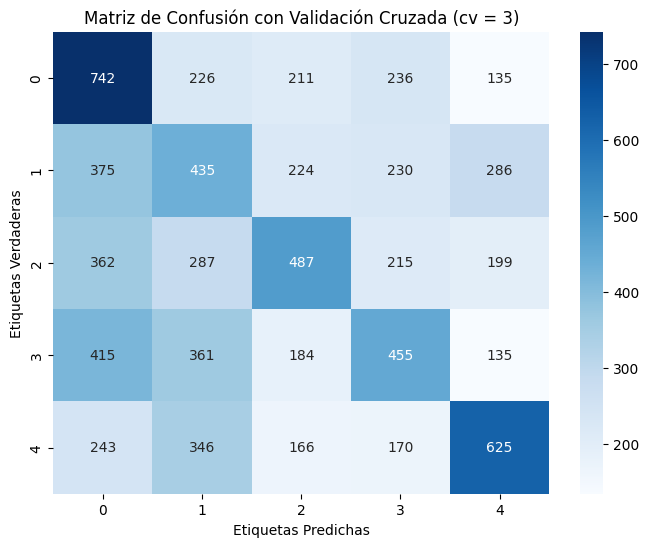

Exactitud media: 0.3540645161290323
Precisión media: 0.35884156496568453
Recall media: 0.3540645161290323
Puntuación F1 media: 0.3528680020096905
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_4.png


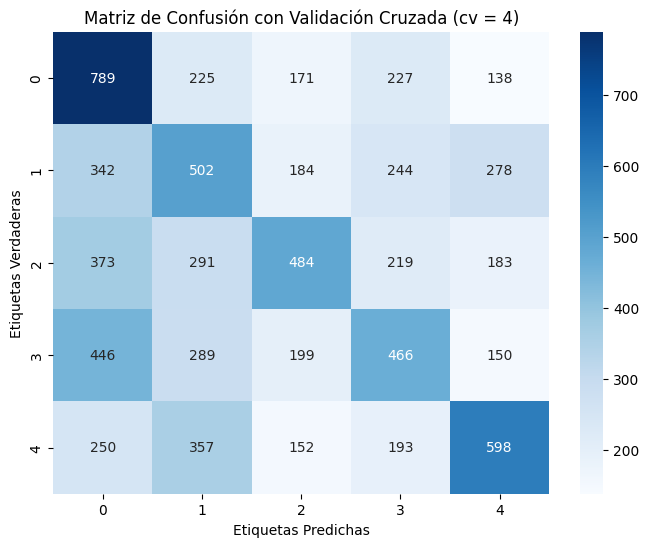

Exactitud media: 0.36632258064516127
Precisión media: 0.37128646598464776
Recall media: 0.36632258064516127
Puntuación F1 media: 0.3641598066768134
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_5.png


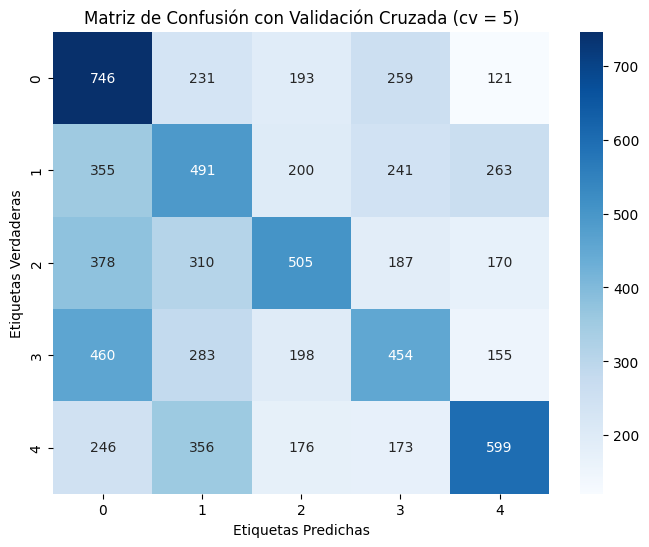

Exactitud media: 0.3606451612903226
Precisión media: 0.367145666608288
Recall media: 0.3606451612903226
Puntuación F1 media: 0.3596908676622803
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_6.png


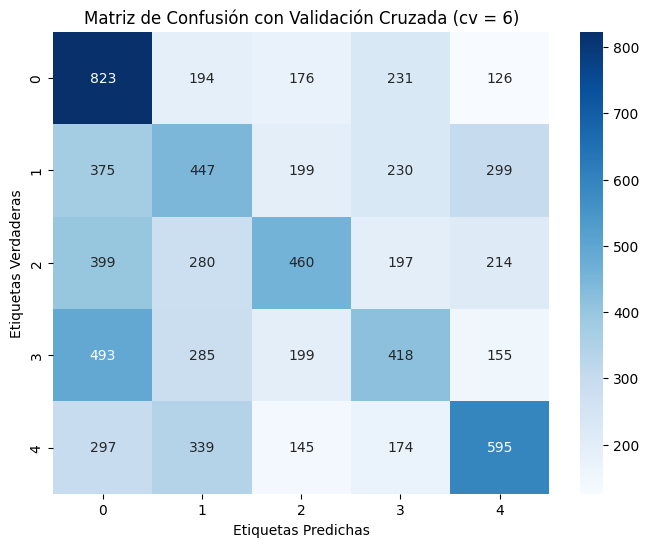

Exactitud media: 0.35393548387096774
Precisión media: 0.3574063041242084
Recall media: 0.35393548387096774
Puntuación F1 media: 0.349505740653394
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_7.png


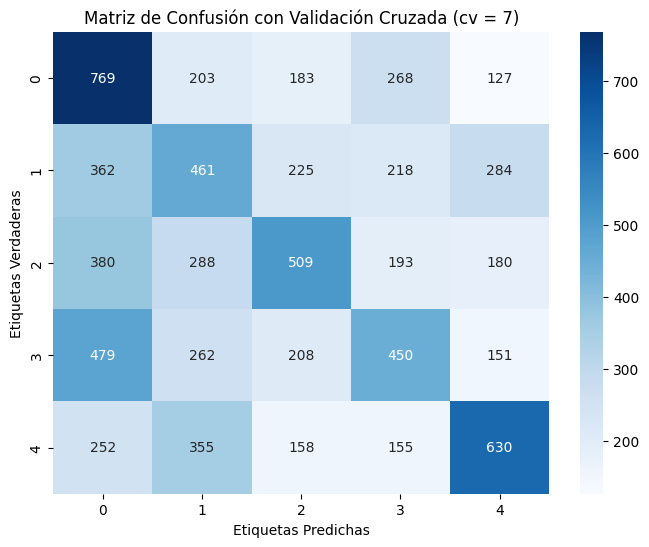

Exactitud media: 0.36374193548387096
Precisión media: 0.36863848554926565
Recall media: 0.36374193548387096
Puntuación F1 media: 0.3618637022476688
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_8.png


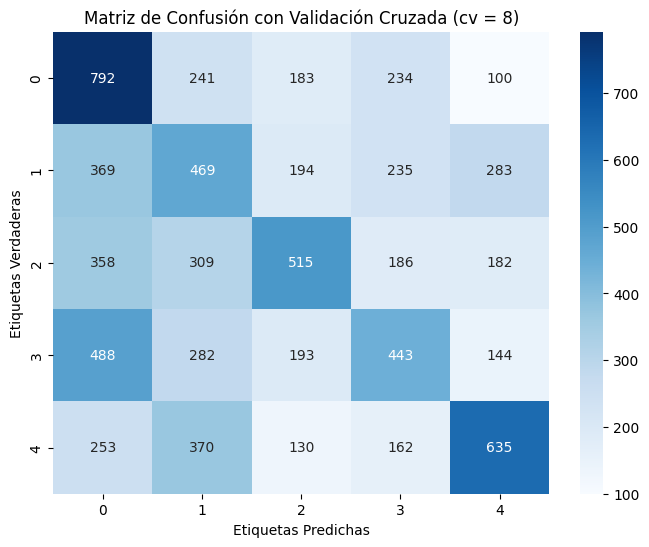

Exactitud media: 0.368258064516129
Precisión media: 0.3758077175293574
Recall media: 0.368258064516129
Puntuación F1 media: 0.36672339418088795
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_9.png


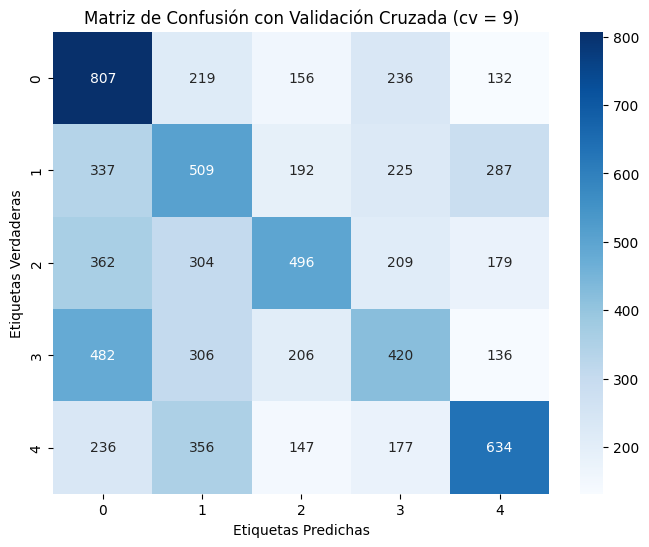

Exactitud media: 0.3698064516129032
Precisión media: 0.37452864576545764
Recall media: 0.3698064516129032
Puntuación F1 media: 0.36706561258570636
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_4_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/matriz_confusion_cv_10.png


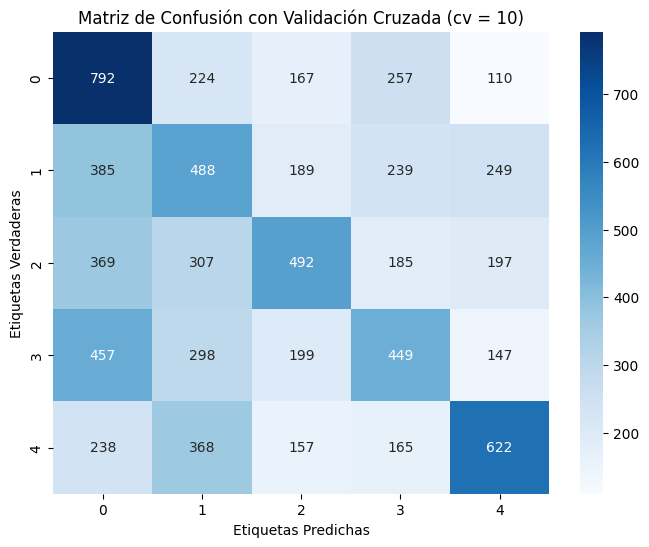

Exactitud media: 0.36683870967741933
Precisión media: 0.3735635761356733
Recall media: 0.36683870967741933
Puntuación F1 media: 0.3650334929253637
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_4_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.1.png


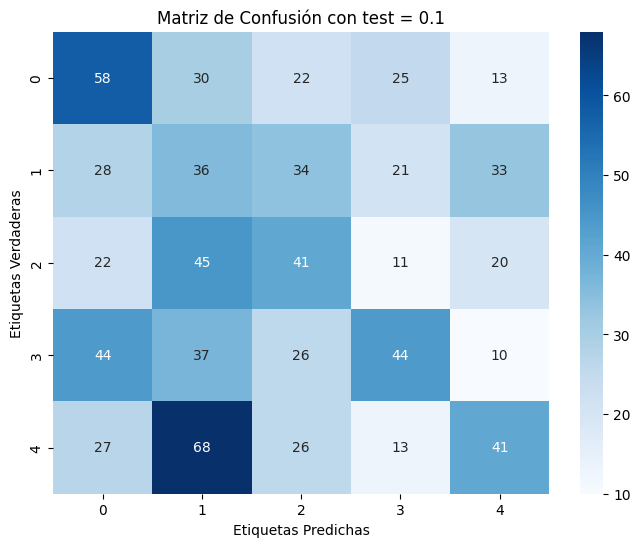

Exactitud del modelo: 0.2838709677419355
Precisión del modelo: 0.3032285160587529
Recall del modelo: 0.2838709677419355
Puntuación F1 del modelo: 0.28707210837690017
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.2.png


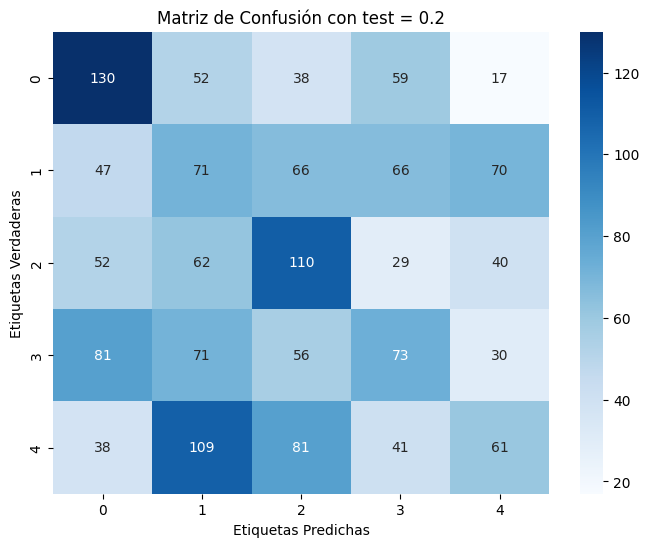

Exactitud del modelo: 0.2870967741935484
Precisión del modelo: 0.28496566833416404
Recall del modelo: 0.2870967741935484
Puntuación F1 del modelo: 0.28246490918376926
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.3.png


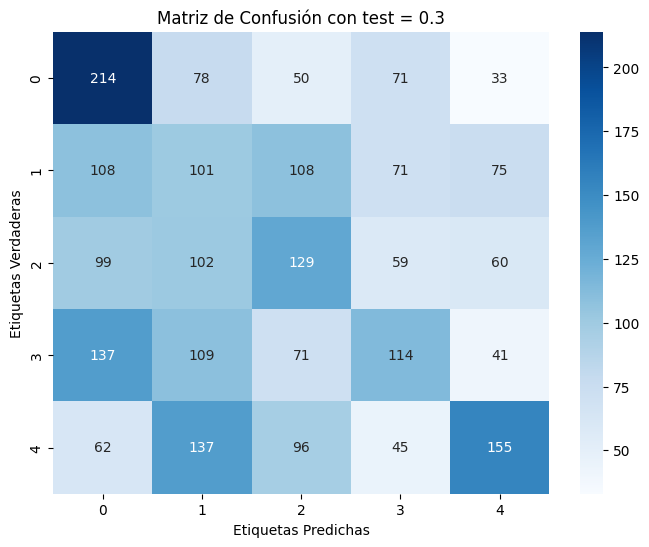

Exactitud del modelo: 0.30666666666666664
Precisión del modelo: 0.3141957891134337
Recall del modelo: 0.30666666666666664
Puntuación F1 del modelo: 0.30529459986881885
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.4.png


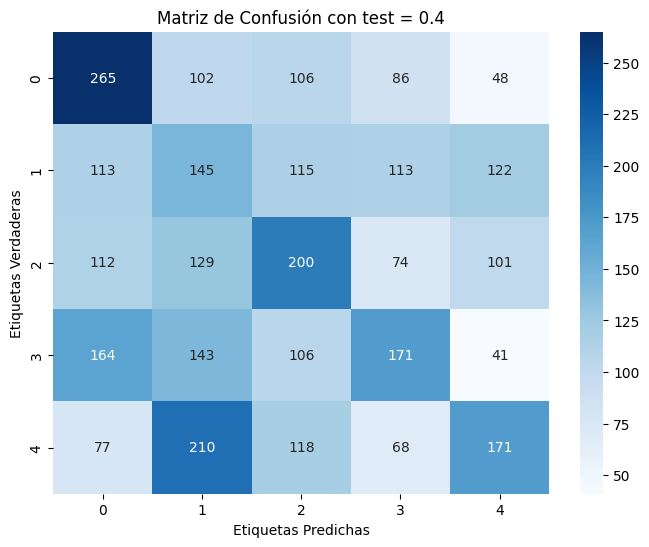

Exactitud del modelo: 0.30709677419354836
Precisión del modelo: 0.312493113085947
Recall del modelo: 0.30709677419354836
Puntuación F1 del modelo: 0.30682002070020836
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.5.png


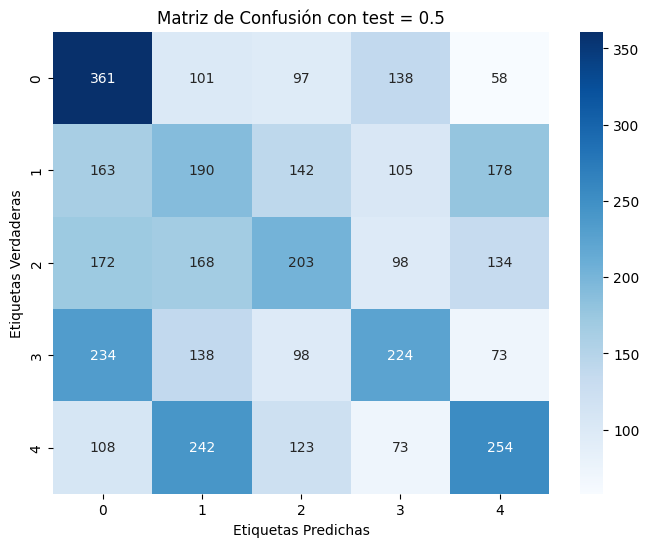

Exactitud del modelo: 0.31793548387096776
Precisión del modelo: 0.31919543302601855
Recall del modelo: 0.31793548387096776
Puntuación F1 del modelo: 0.3152792984692514
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.6.png


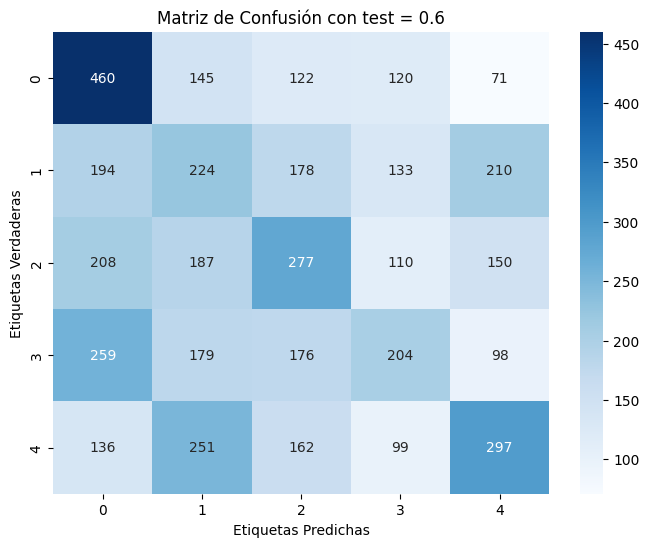

Exactitud del modelo: 0.3144086021505376
Precisión del modelo: 0.3122099776847169
Recall del modelo: 0.3144086021505376
Puntuación F1 del modelo: 0.3095866866087649
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.7.png


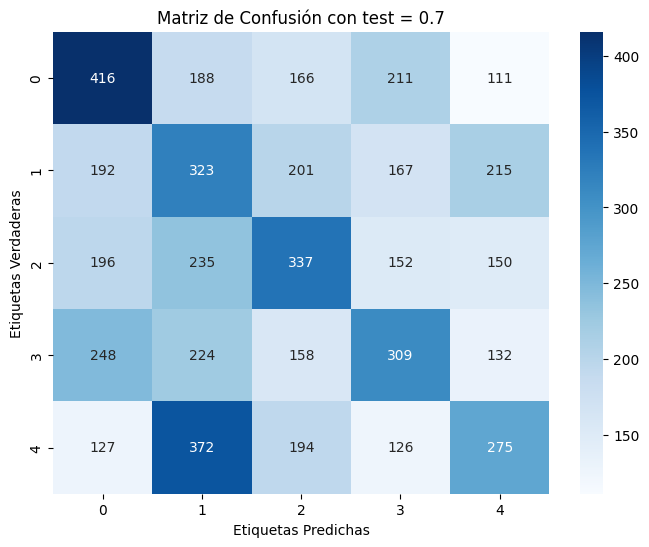

Exactitud del modelo: 0.30599078341013825
Precisión del modelo: 0.3087002350195074
Recall del modelo: 0.30599078341013825
Puntuación F1 del modelo: 0.3058838803274018
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.8.png


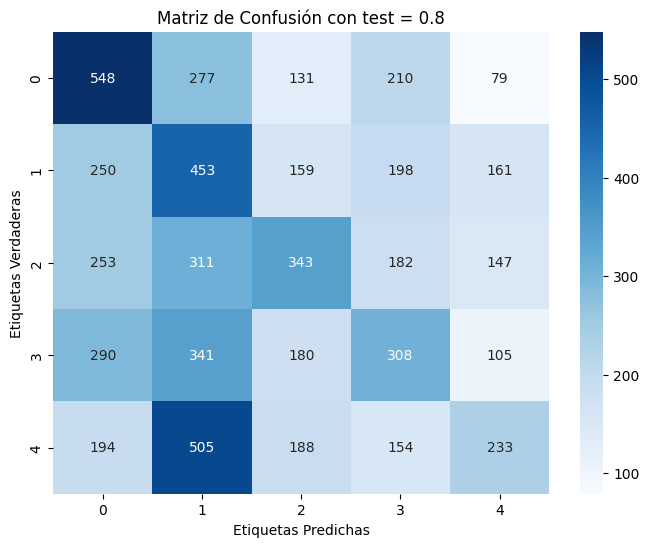

Exactitud del modelo: 0.3040322580645161
Precisión del modelo: 0.3111138441590115
Recall del modelo: 0.3040322580645161
Puntuación F1 del modelo: 0.2990422830181067
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/matriz_confusion_test_0.9.png


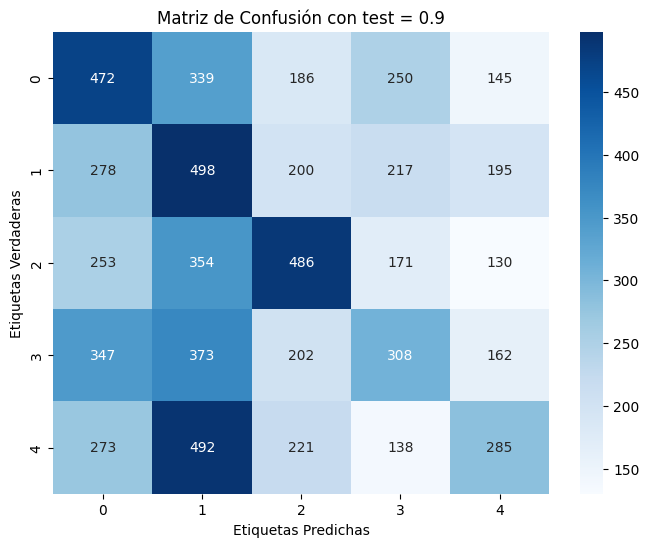

Exactitud del modelo: 0.29376344086021505
Precisión del modelo: 0.30073080968454924
Recall del modelo: 0.29376344086021505
Puntuación F1 del modelo: 0.2914314747042715
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_5_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_5_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_2.png


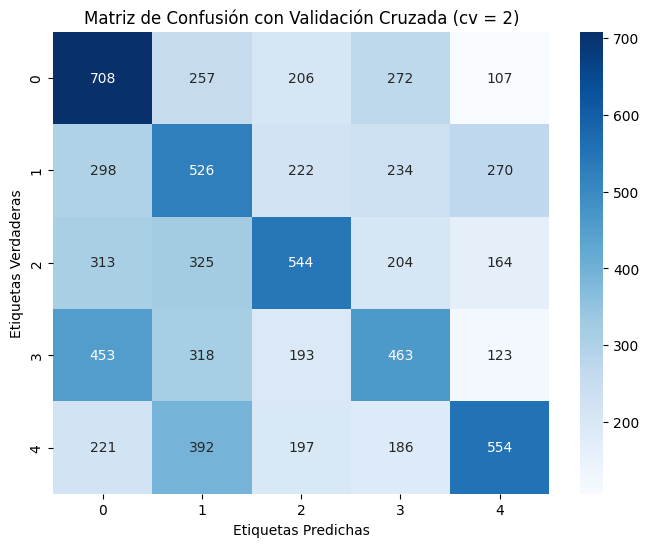

Exactitud media: 0.3606451612903226
Precisión media: 0.3679041209485114
Recall media: 0.3606451612903226
Puntuación F1 media: 0.36085013729331444
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_3.png


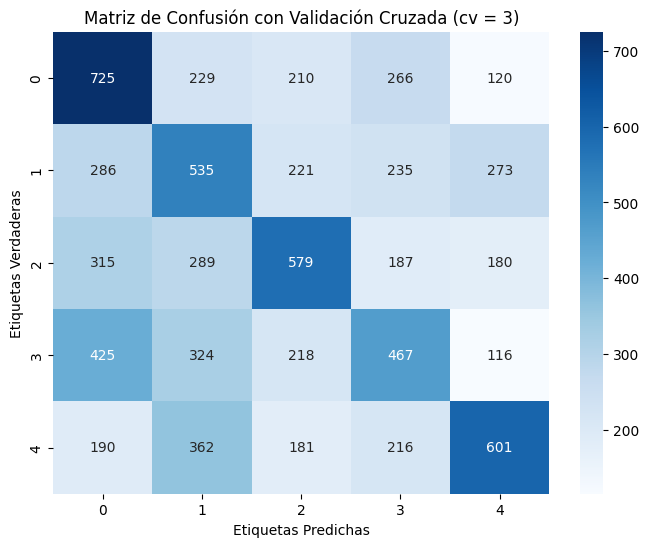

Exactitud media: 0.37509677419354837
Precisión media: 0.3797230735948216
Recall media: 0.37509677419354837
Puntuación F1 media: 0.37500439762201393
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_4.png


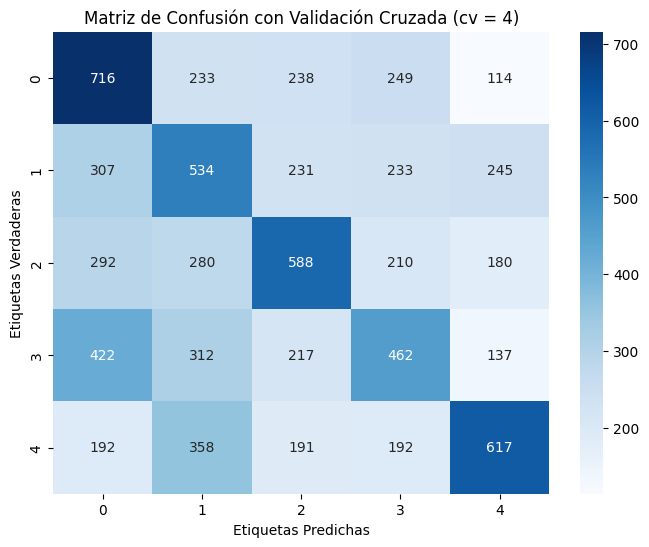

Exactitud media: 0.3763870967741936
Precisión media: 0.3807947206768589
Recall media: 0.3763870967741936
Puntuación F1 media: 0.3763354030300378
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_5.png


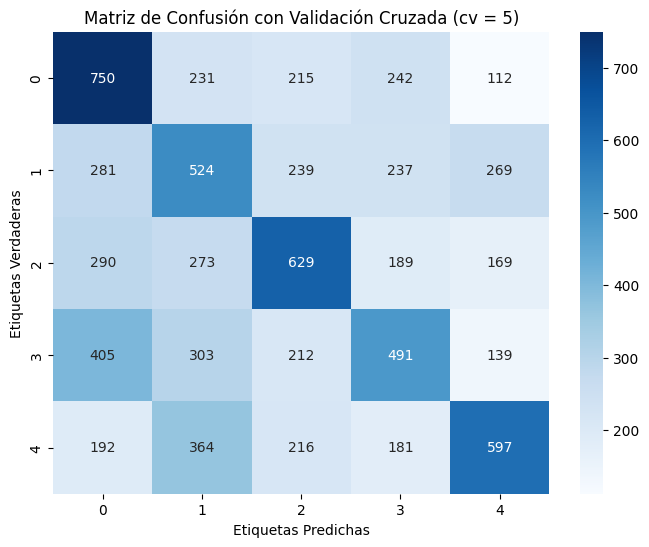

Exactitud media: 0.38593548387096777
Precisión media: 0.3894211117001822
Recall media: 0.38593548387096777
Puntuación F1 media: 0.3854538112820606
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_6.png


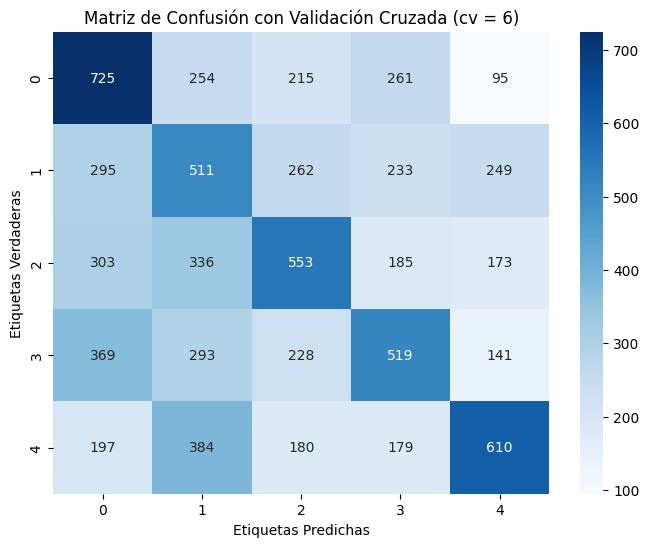

Exactitud media: 0.37651612903225806
Precisión media: 0.3827486584984209
Recall media: 0.37651612903225806
Puntuación F1 media: 0.3772866535938726
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_7.png


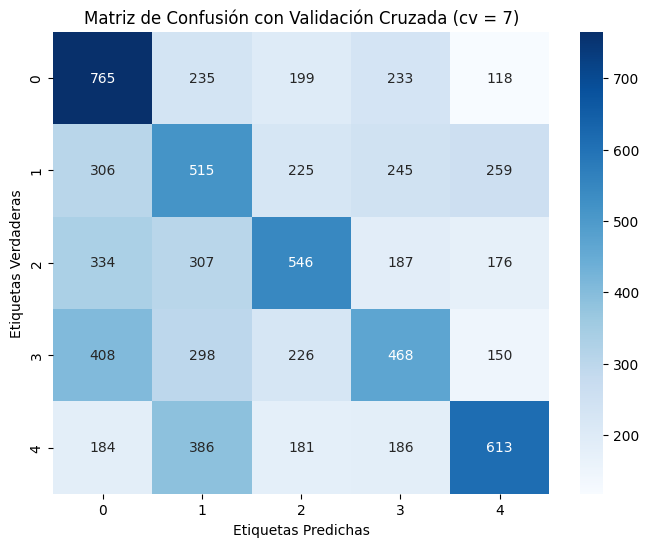

Exactitud media: 0.37509677419354837
Precisión media: 0.37920310099033033
Recall media: 0.37509677419354837
Puntuación F1 media: 0.3742846866948676
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_8.png


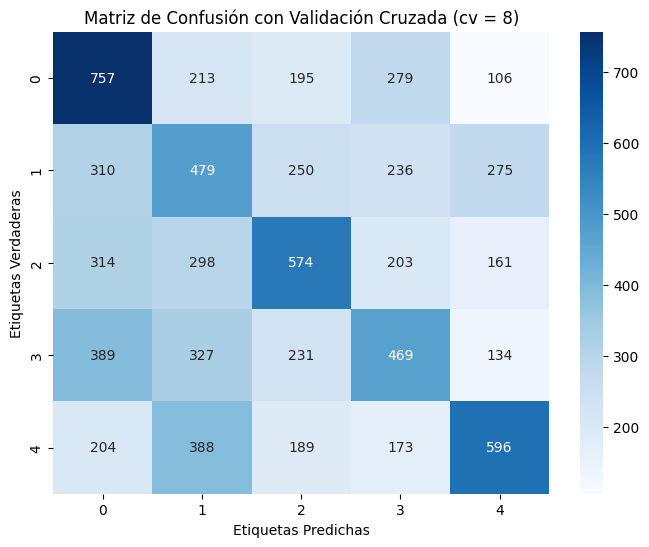

Exactitud media: 0.3709677419354839
Precisión media: 0.37534364849664403
Recall media: 0.3709677419354839
Puntuación F1 media: 0.3705498074651617
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_9.png


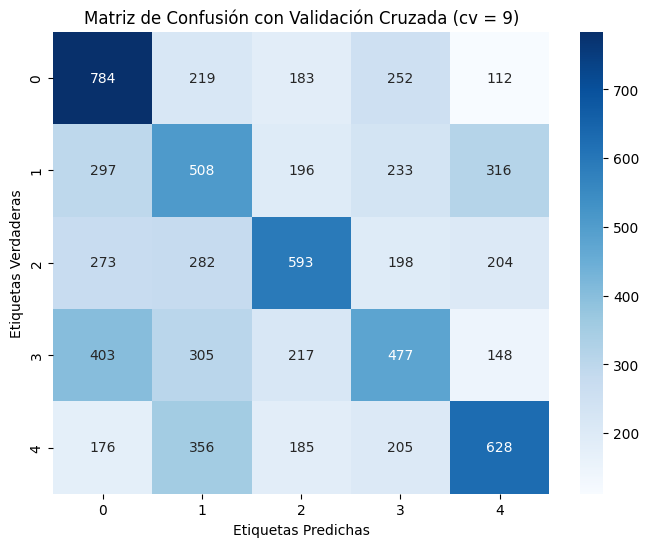

Exactitud media: 0.3858064516129032
Precisión media: 0.3873677344268013
Recall media: 0.3858064516129032
Puntuación F1 media: 0.3846414554484732
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_5_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/matriz_confusion_cv_10.png


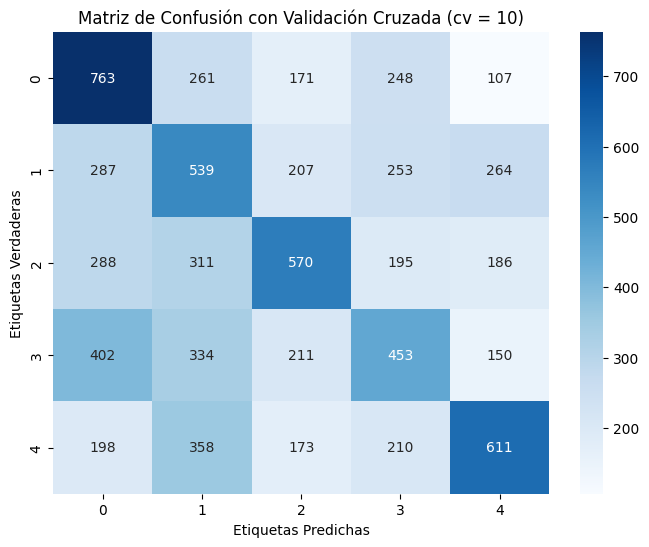

Exactitud media: 0.37883870967741934
Precisión media: 0.38349869920209495
Recall media: 0.37883870967741934
Puntuación F1 media: 0.37841797933831384
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_5_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.1.png


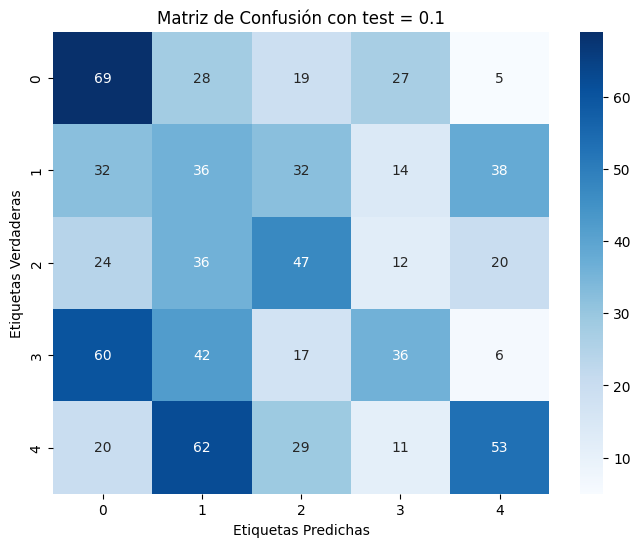

Exactitud del modelo: 0.3109677419354839
Precisión del modelo: 0.33031072164851116
Recall del modelo: 0.3109677419354839
Puntuación F1 del modelo: 0.3117951572167729
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.2.png


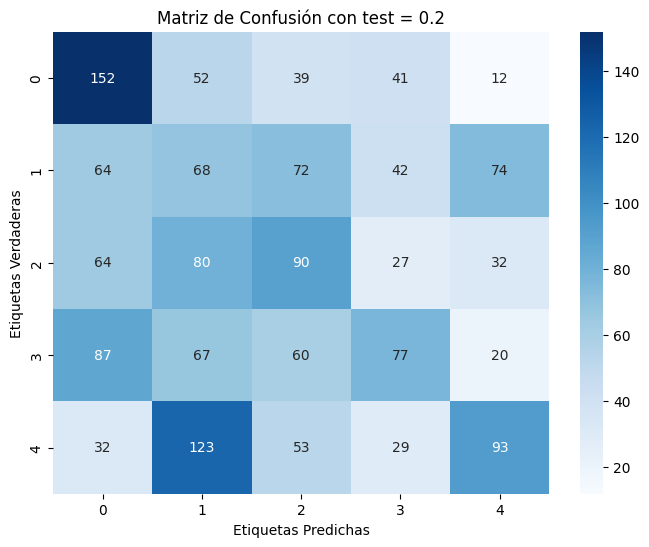

Exactitud del modelo: 0.3096774193548387
Precisión del modelo: 0.32016809798348733
Recall del modelo: 0.3096774193548387
Puntuación F1 del modelo: 0.30835335629103355
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.3.png


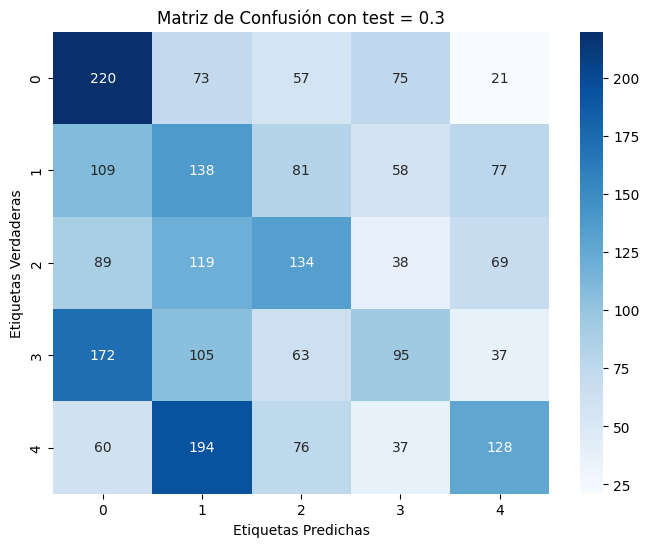

Exactitud del modelo: 0.30752688172043013
Precisión del modelo: 0.3173133758710127
Recall del modelo: 0.30752688172043013
Puntuación F1 del modelo: 0.30319942755165397
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.4.png


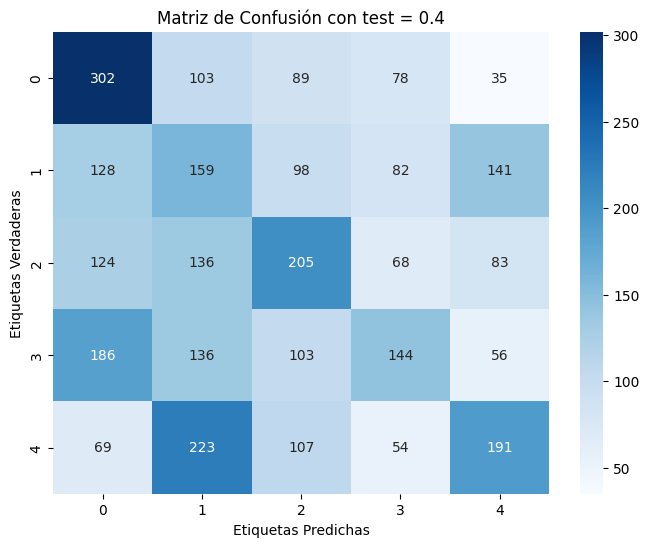

Exactitud del modelo: 0.3229032258064516
Precisión del modelo: 0.3285236699323127
Recall del modelo: 0.3229032258064516
Puntuación F1 del modelo: 0.32035607046592024
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.5.png


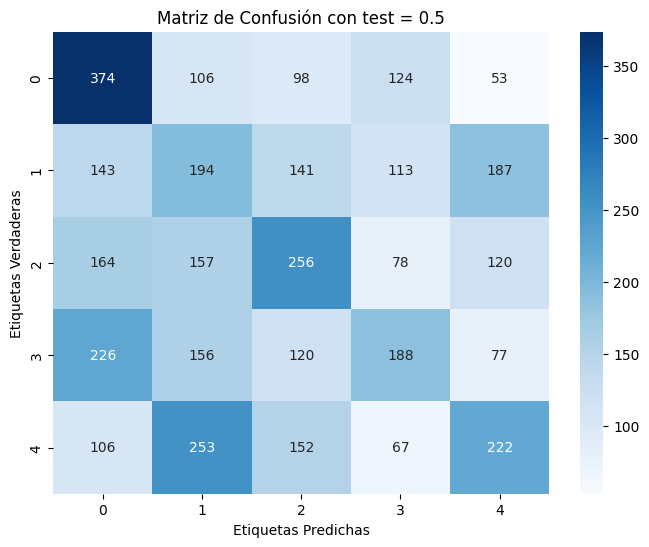

Exactitud del modelo: 0.3184516129032258
Precisión del modelo: 0.31849741820526145
Recall del modelo: 0.3184516129032258
Puntuación F1 del modelo: 0.31471536452613735
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.6.png


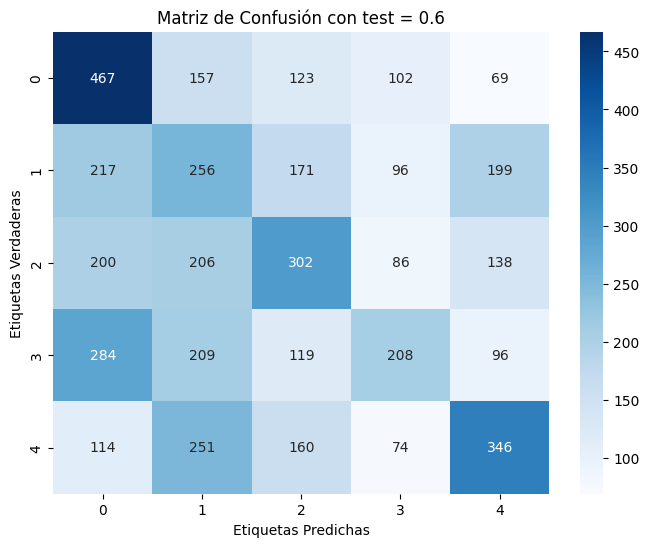

Exactitud del modelo: 0.3395698924731183
Precisión del modelo: 0.3443141928278402
Recall del modelo: 0.3395698924731183
Puntuación F1 del modelo: 0.335772045487297
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.7.png


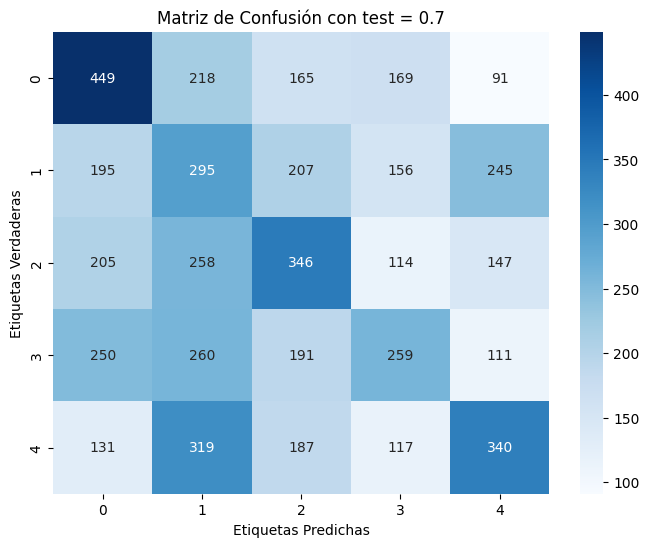

Exactitud del modelo: 0.3113364055299539
Precisión del modelo: 0.31611952201957333
Recall del modelo: 0.3113364055299539
Puntuación F1 del modelo: 0.3114792006549545
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.8.png


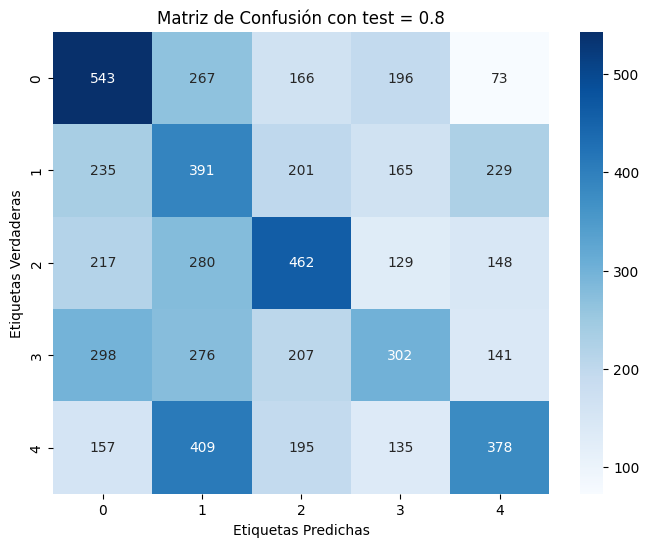

Exactitud del modelo: 0.33483870967741935
Precisión del modelo: 0.3419349333798042
Recall del modelo: 0.33483870967741935
Puntuación F1 del modelo: 0.33442948643614123
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/matriz_confusion_test_0.9.png


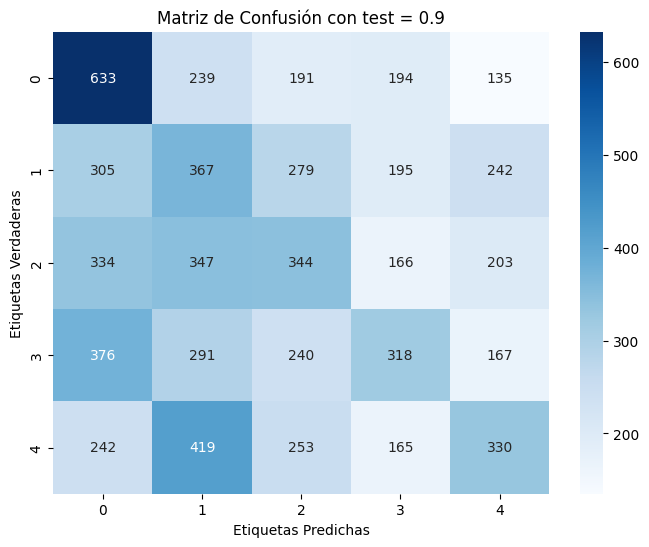

Exactitud del modelo: 0.28559139784946236
Precisión del modelo: 0.2863938546053876
Recall del modelo: 0.28559139784946236
Puntuación F1 del modelo: 0.28162700854453454
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_6_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_6_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_2.png


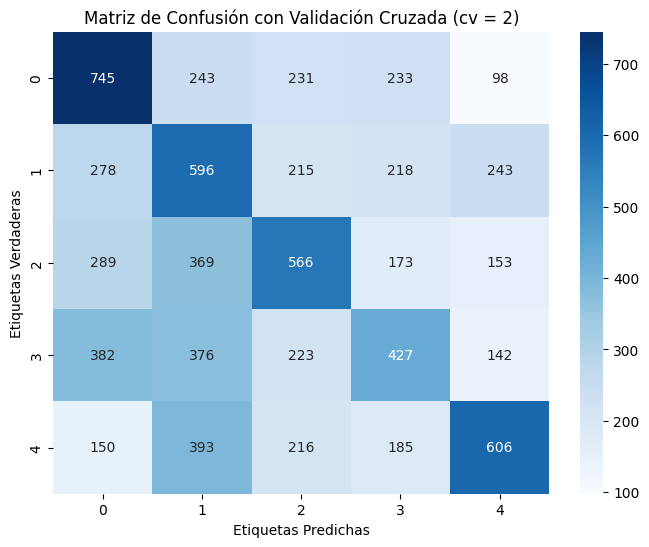

Exactitud media: 0.3793548387096774
Precisión media: 0.38578953098832003
Recall media: 0.3793548387096774
Puntuación F1 media: 0.37896239505082135
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_3.png


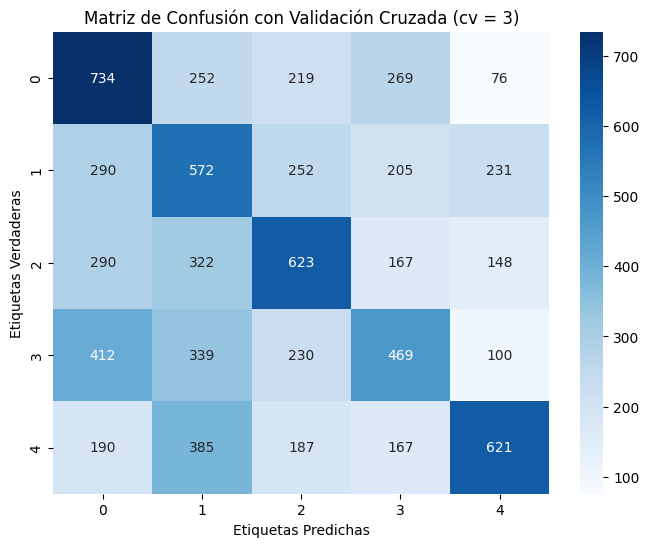

Exactitud media: 0.3895483870967742
Precisión media: 0.3993220217097794
Recall media: 0.3895483870967742
Puntuación F1 media: 0.3905031089875666
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_4.png


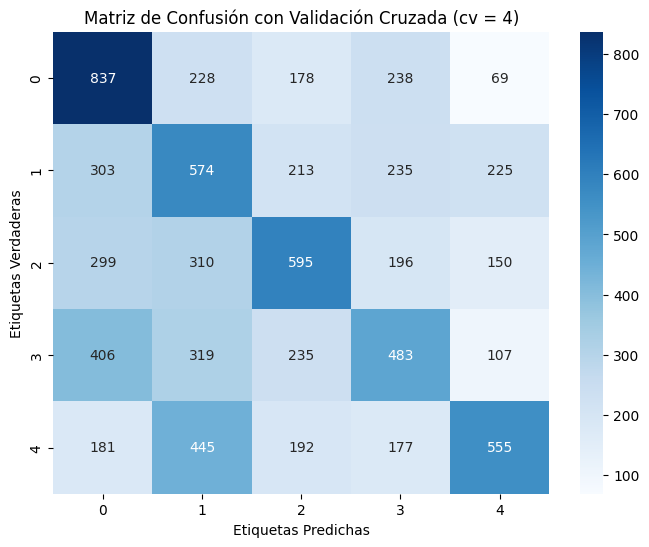

Exactitud media: 0.3927741935483871
Precisión media: 0.40108576346055463
Recall media: 0.3927741935483871
Puntuación F1 media: 0.3916560579849659
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_5.png


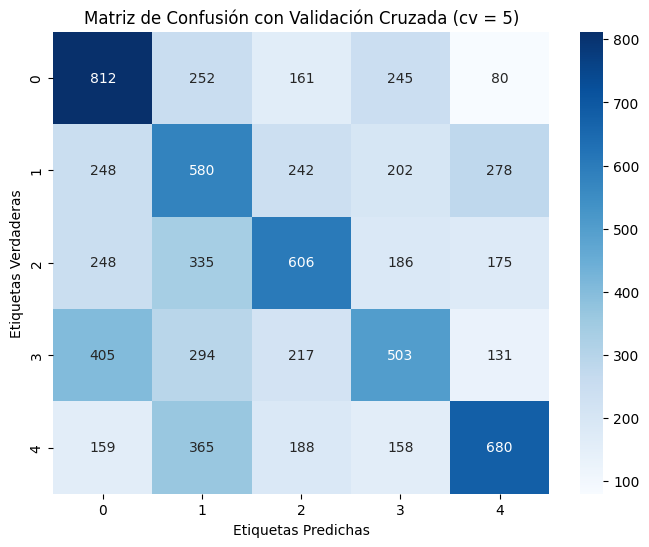

Exactitud media: 0.4104516129032258
Precisión media: 0.41492716448909067
Recall media: 0.4104516129032258
Puntuación F1 media: 0.410149999345641
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_6.png


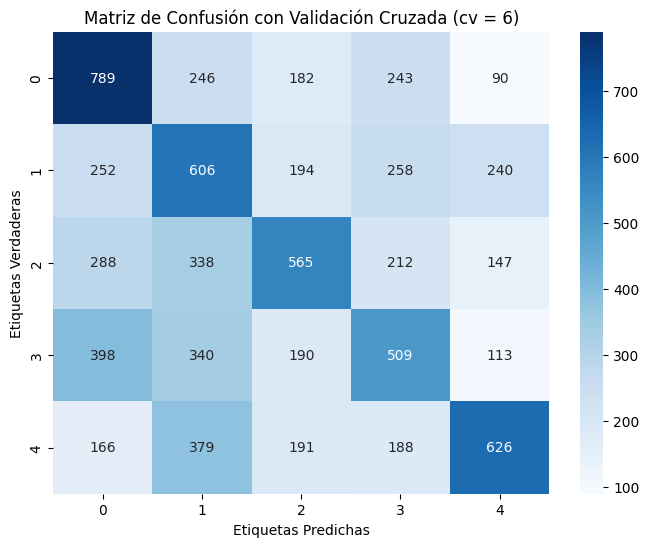

Exactitud media: 0.3993548387096774
Precisión media: 0.4074841425500226
Recall media: 0.3993548387096774
Puntuación F1 media: 0.3997447331552993
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_7.png


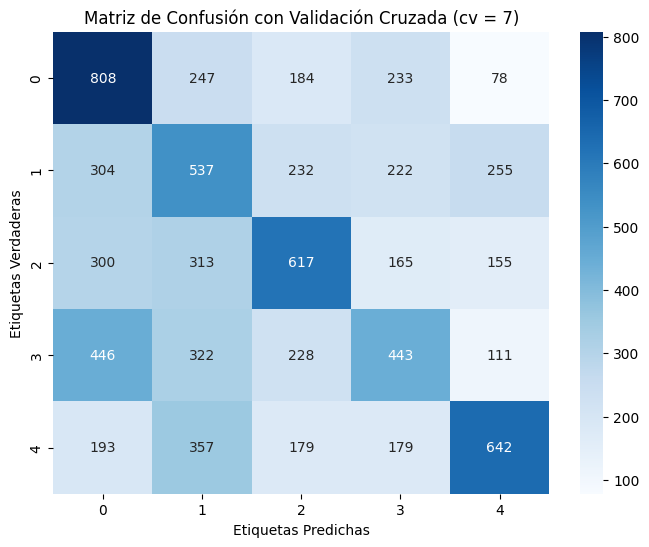

Exactitud media: 0.3931612903225806
Precisión media: 0.39975975272519093
Recall media: 0.3931612903225806
Puntuación F1 media: 0.392353813985992
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_8.png


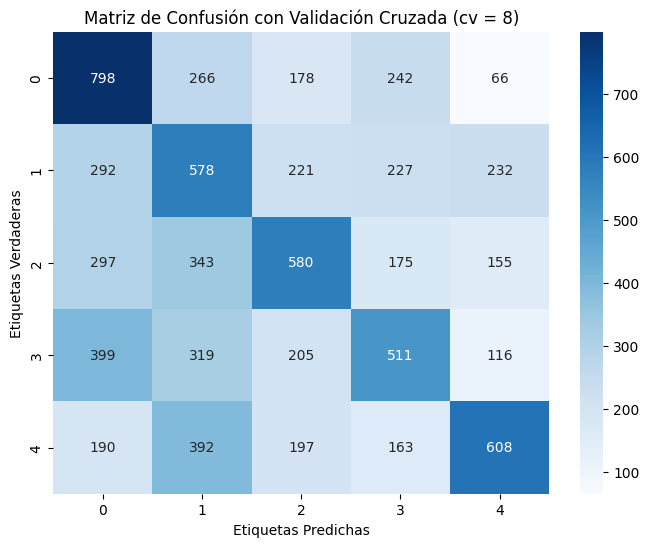

Exactitud media: 0.3967741935483871
Precisión media: 0.4065277902027489
Recall media: 0.3967741935483871
Puntuación F1 media: 0.39718617527930933
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_9.png


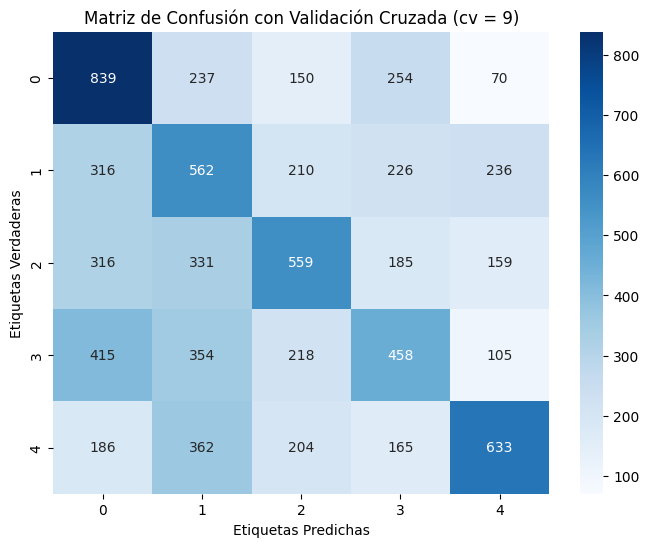

Exactitud media: 0.3936774193548387
Precisión media: 0.4015985024459589
Recall media: 0.3936774193548387
Puntuación F1 media: 0.39271989059001794
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_6_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/matriz_confusion_cv_10.png


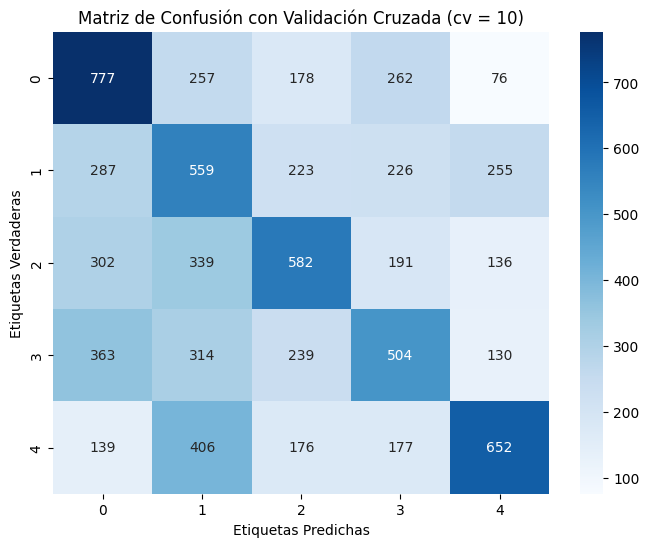

Exactitud media: 0.39664516129032257
Precisión media: 0.40460021727731027
Recall media: 0.39664516129032257
Puntuación F1 media: 0.39763831742025907
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_6_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.1.png


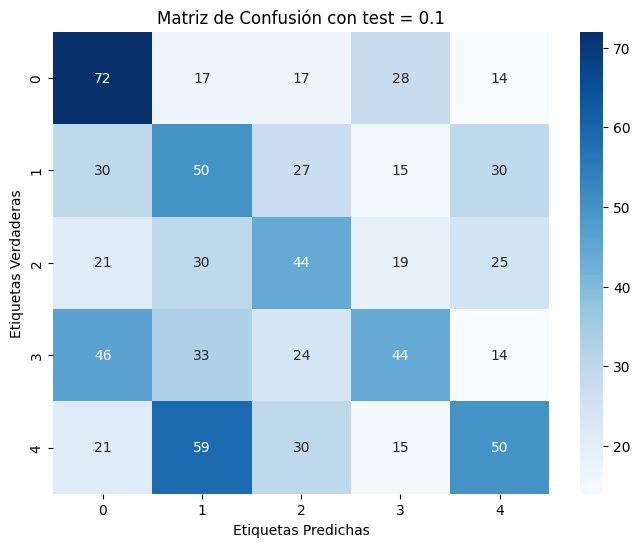

Exactitud del modelo: 0.33548387096774196
Precisión del modelo: 0.34025961484236433
Recall del modelo: 0.33548387096774196
Puntuación F1 del modelo: 0.3331840002281239
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.2.png


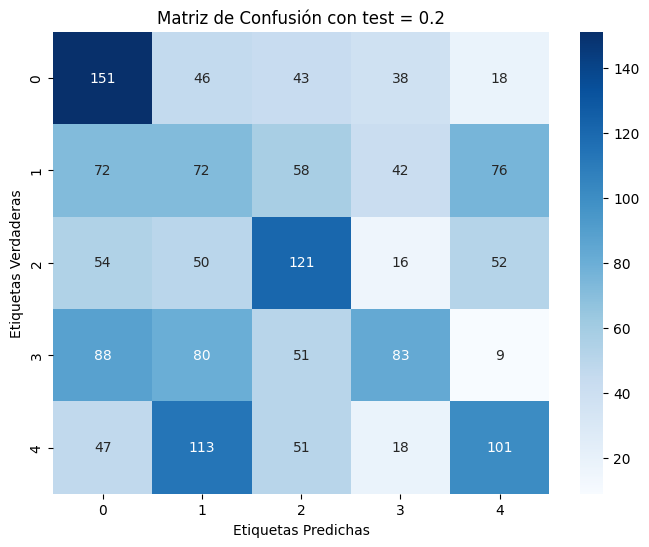

Exactitud del modelo: 0.3406451612903226
Precisión del modelo: 0.3502946841507155
Recall del modelo: 0.3406451612903226
Puntuación F1 del modelo: 0.33821027043580854
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.3.png


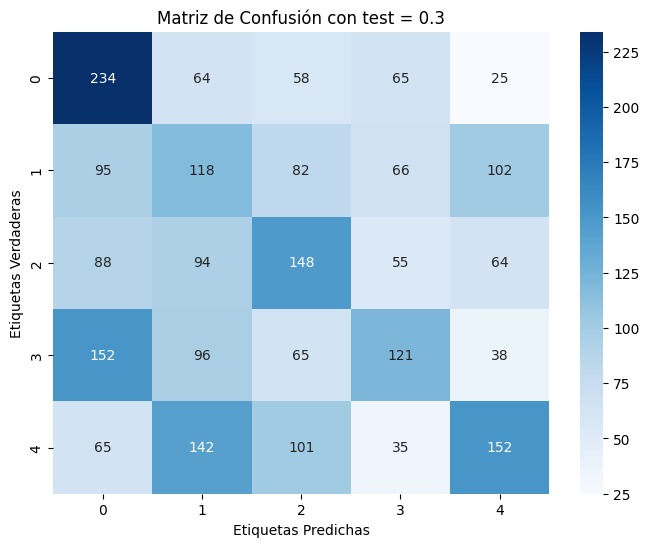

Exactitud del modelo: 0.3324731182795699
Precisión del modelo: 0.3362358396712924
Recall del modelo: 0.3324731182795699
Puntuación F1 del modelo: 0.3287710321957556
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.4.png


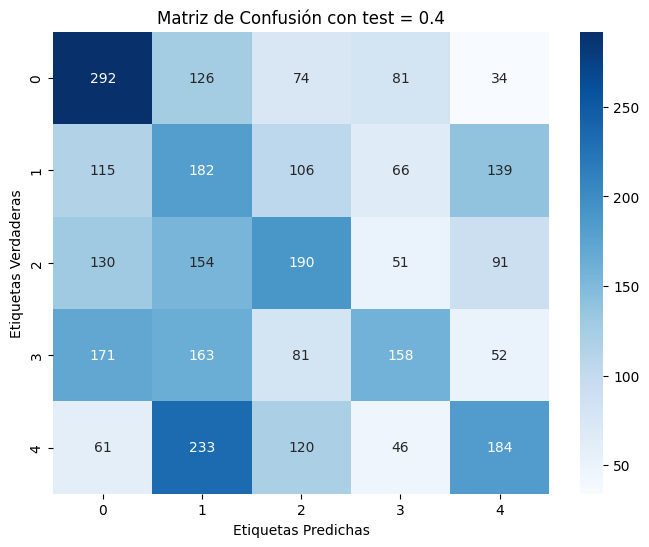

Exactitud del modelo: 0.32451612903225807
Precisión del modelo: 0.33776404494849865
Recall del modelo: 0.32451612903225807
Puntuación F1 del modelo: 0.32427639432992283
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.5.png


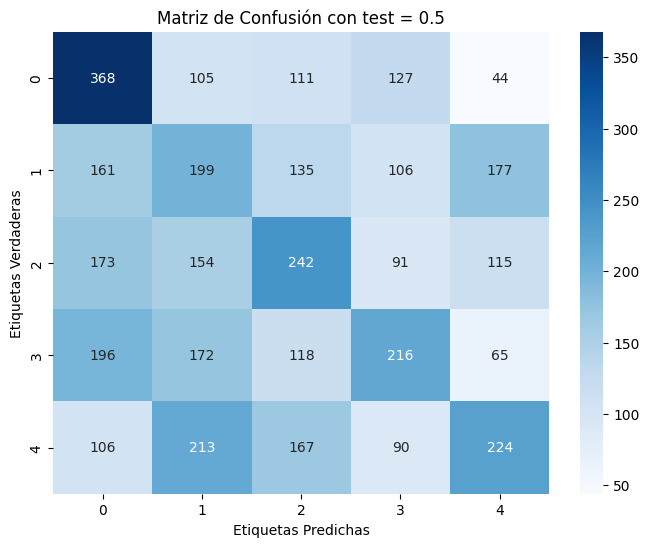

Exactitud del modelo: 0.3223225806451613
Precisión del modelo: 0.3232791274229738
Recall del modelo: 0.3223225806451613
Puntuación F1 del modelo: 0.31946608785581765
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.6.png


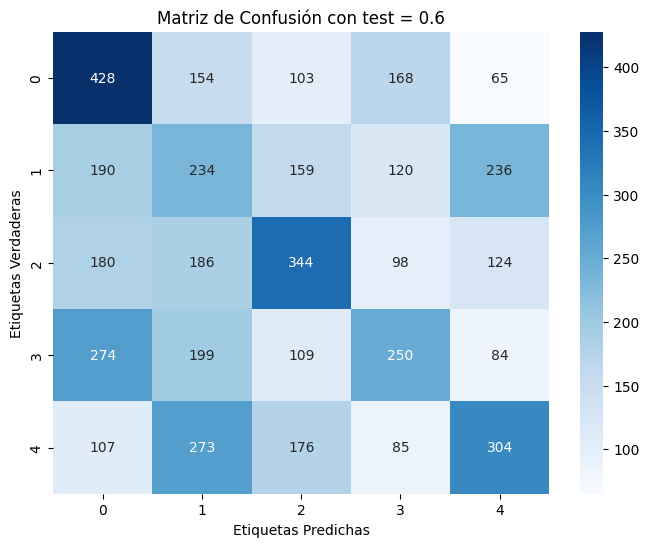

Exactitud del modelo: 0.33548387096774196
Precisión del modelo: 0.33851973528255963
Recall del modelo: 0.33548387096774196
Puntuación F1 del modelo: 0.33429220076529076
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.7.png


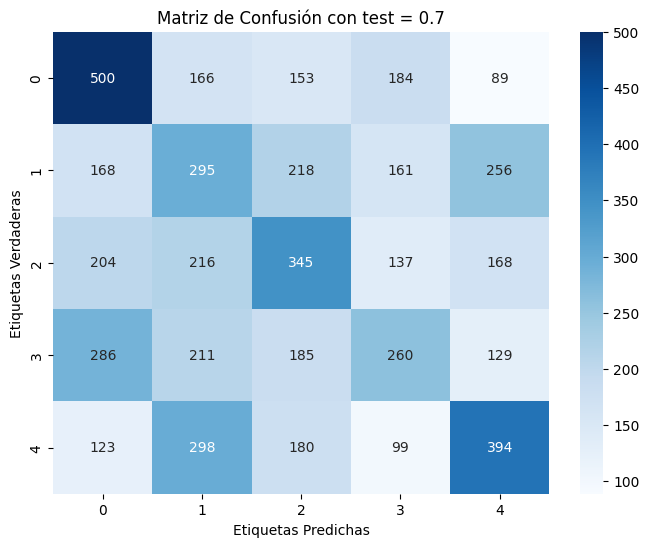

Exactitud del modelo: 0.3306912442396313
Precisión del modelo: 0.3295841308453832
Recall del modelo: 0.3306912442396313
Puntuación F1 del modelo: 0.32867308019924274
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.8.png


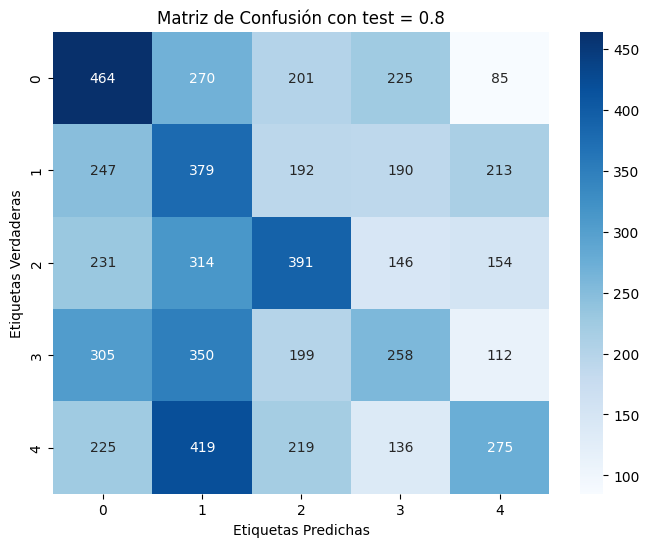

Exactitud del modelo: 0.285
Precisión del modelo: 0.29192582697404706
Recall del modelo: 0.285
Puntuación F1 del modelo: 0.2833172483989639
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/matriz_confusion_test_0.9.png


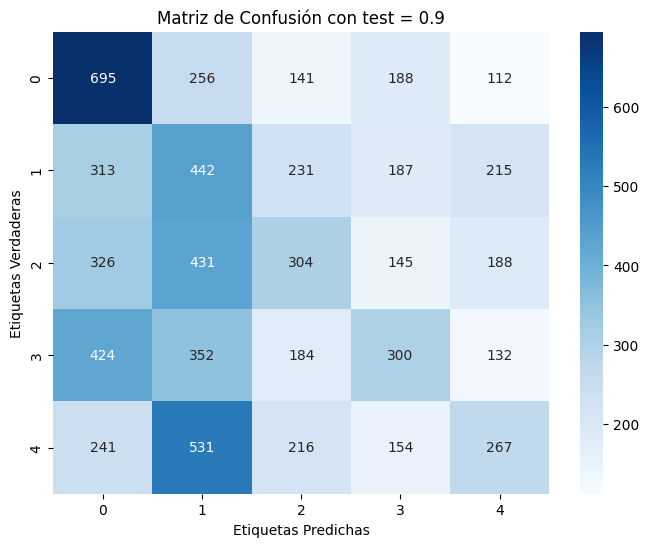

Exactitud del modelo: 0.2878853046594982
Precisión del modelo: 0.29004622594224155
Recall del modelo: 0.2878853046594982
Puntuación F1 del modelo: 0.2797858286456666
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_7_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_7_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_2.png


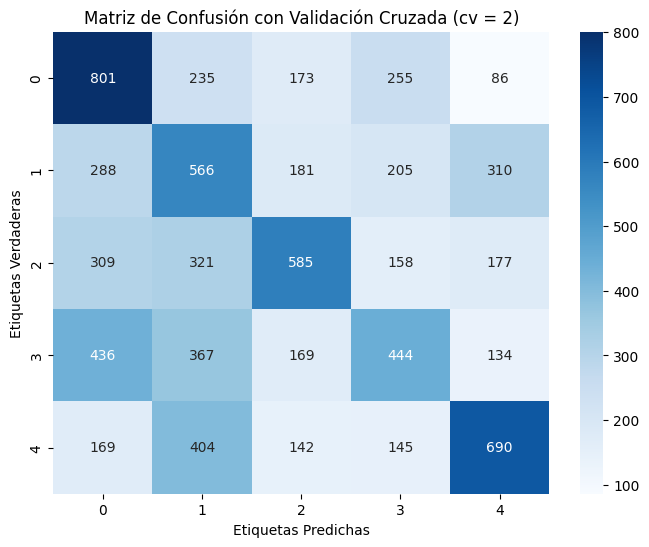

Exactitud media: 0.39819354838709675
Precisión media: 0.40573323383078314
Recall media: 0.39819354838709675
Puntuación F1 media: 0.39757776057376265
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_3.png


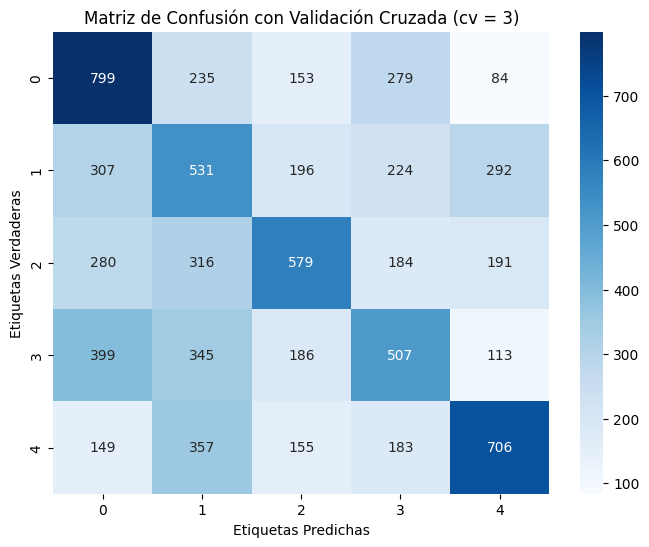

Exactitud media: 0.40283870967741936
Precisión media: 0.408923029622302
Recall media: 0.40283870967741936
Puntuación F1 media: 0.40306893565483826
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_4.png


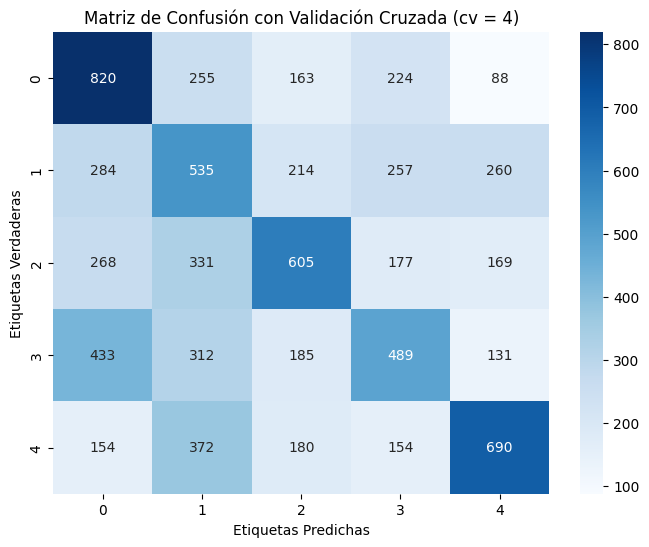

Exactitud media: 0.40503225806451615
Precisión media: 0.41113716764655023
Recall media: 0.40503225806451615
Puntuación F1 media: 0.40496938336178845
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_5.png


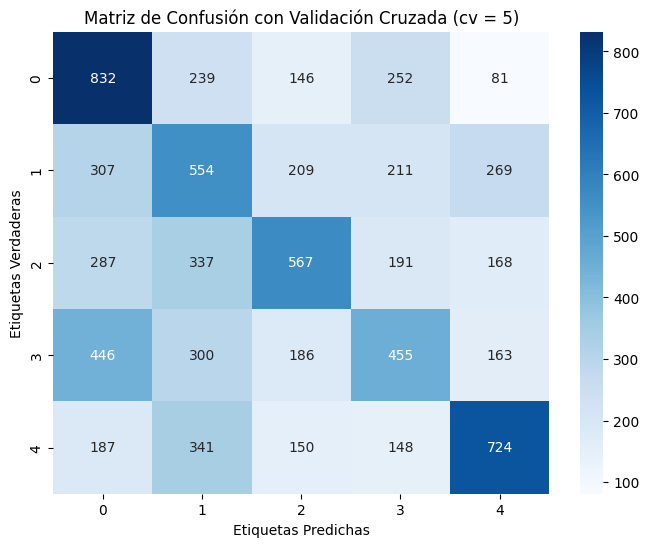

Exactitud media: 0.4041290322580645
Precisión media: 0.4089776262719496
Recall media: 0.4041290322580645
Puntuación F1 media: 0.40255131926227905
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_6.png


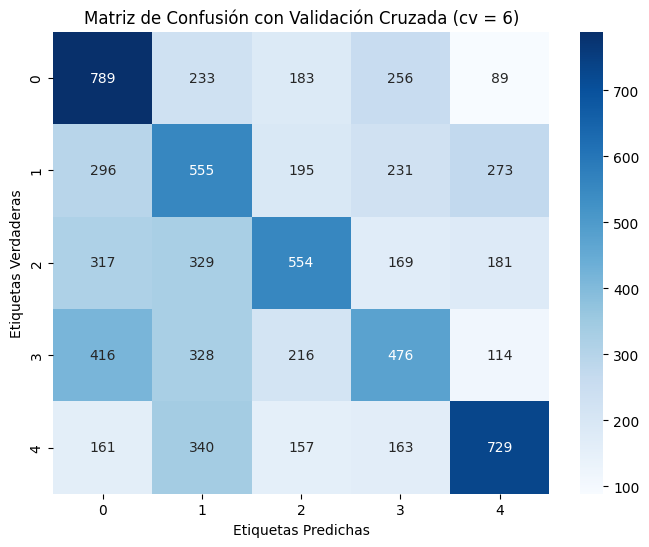

Exactitud media: 0.40038709677419354
Precisión media: 0.40553464824810914
Recall media: 0.40038709677419354
Puntuación F1 media: 0.3998585937649191
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_7.png


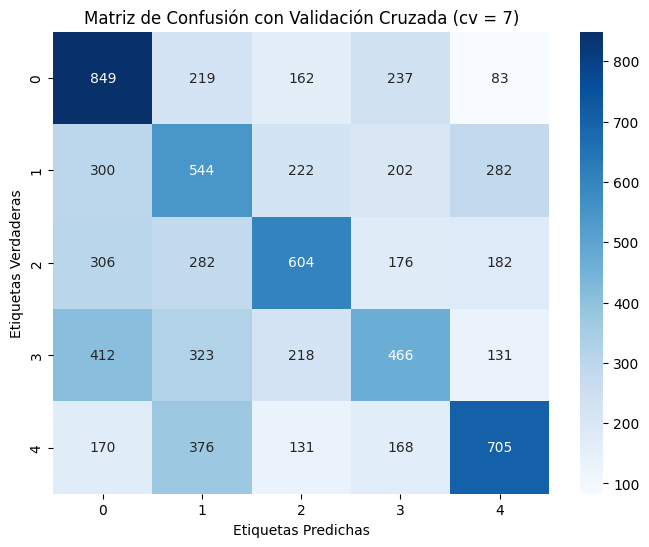

Exactitud media: 0.4087741935483871
Precisión media: 0.41266670703242786
Recall media: 0.4087741935483871
Puntuación F1 media: 0.4071627068880524
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_8.png


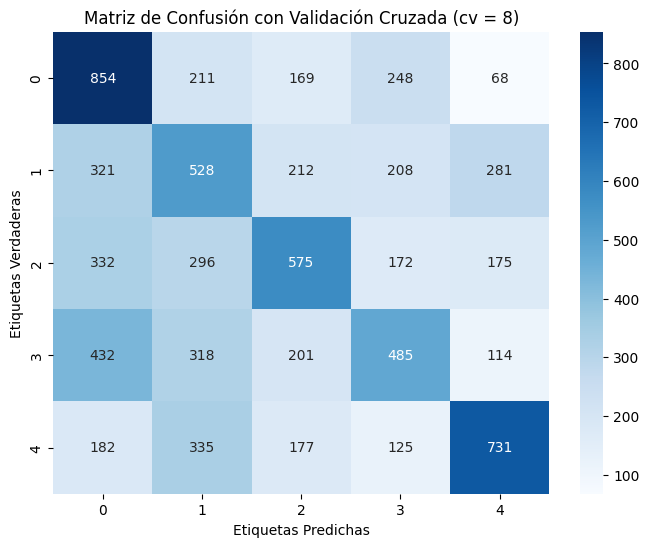

Exactitud media: 0.40941935483870967
Precisión media: 0.41443965176641373
Recall media: 0.40941935483870967
Puntuación F1 media: 0.407784681071365
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_9.png


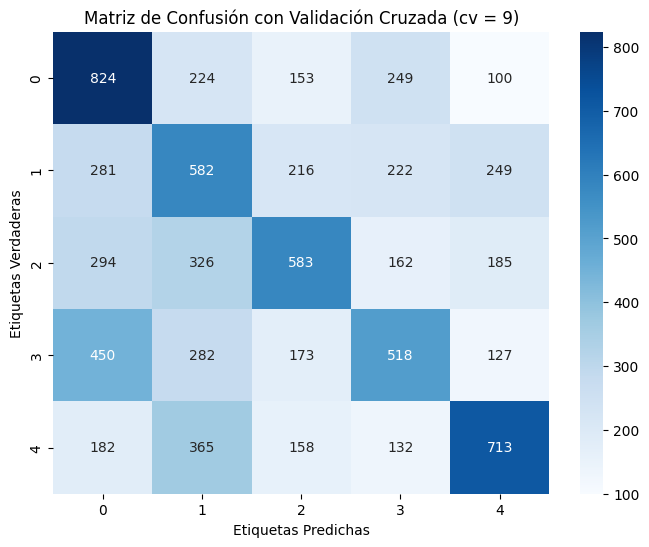

Exactitud media: 0.4154838709677419
Precisión media: 0.4219858764404798
Recall media: 0.4154838709677419
Puntuación F1 media: 0.4149634418943678
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_7_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/matriz_confusion_cv_10.png


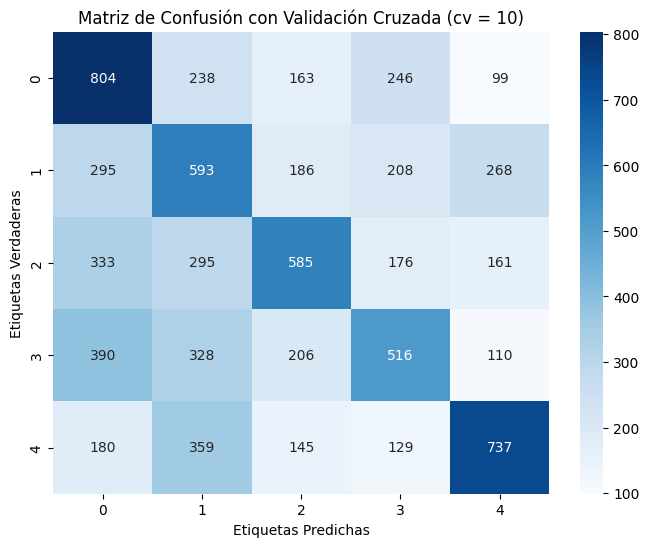

Exactitud media: 0.4174193548387097
Precisión media: 0.4249278772928644
Recall media: 0.4174193548387097
Puntuación F1 media: 0.4174607576297439
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_7_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.1.png


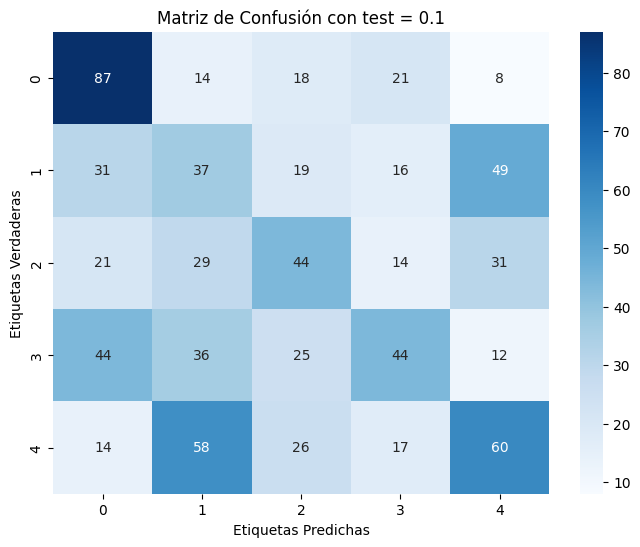

Exactitud del modelo: 0.35096774193548386
Precisión del modelo: 0.3521168754905338
Recall del modelo: 0.35096774193548386
Puntuación F1 del modelo: 0.34692526473865914
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.2.png


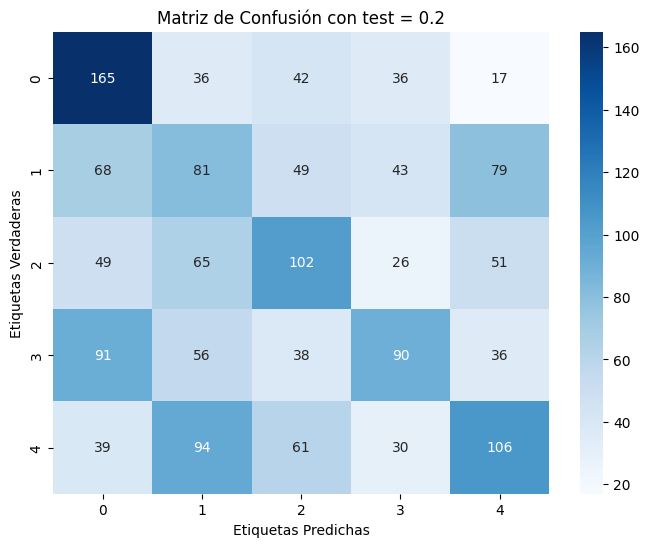

Exactitud del modelo: 0.35096774193548386
Precisión del modelo: 0.35122797150273877
Recall del modelo: 0.35096774193548386
Puntuación F1 del modelo: 0.3465232020943442
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.3.png


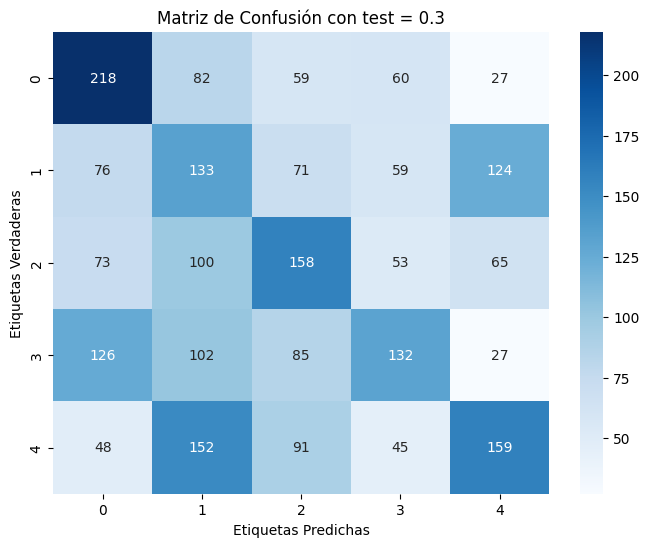

Exactitud del modelo: 0.34408602150537637
Precisión del modelo: 0.350597656280103
Recall del modelo: 0.34408602150537637
Puntuación F1 del modelo: 0.3436651037431498
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.4.png


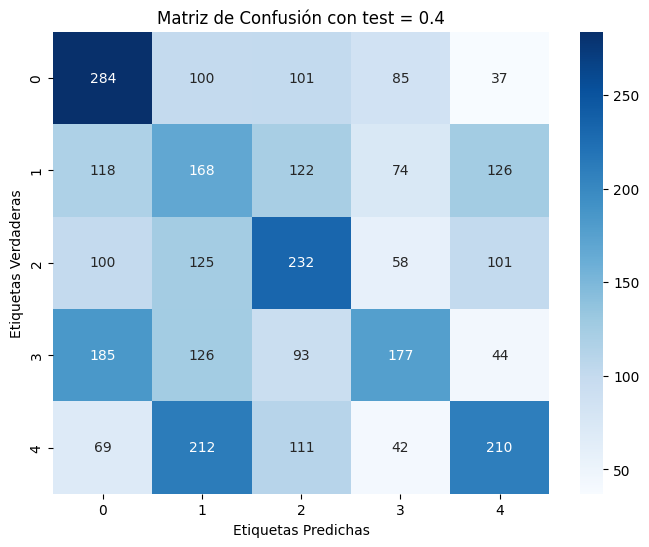

Exactitud del modelo: 0.3454838709677419
Precisión del modelo: 0.3546543182130925
Recall del modelo: 0.3454838709677419
Puntuación F1 del modelo: 0.3454831696021014
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.5.png


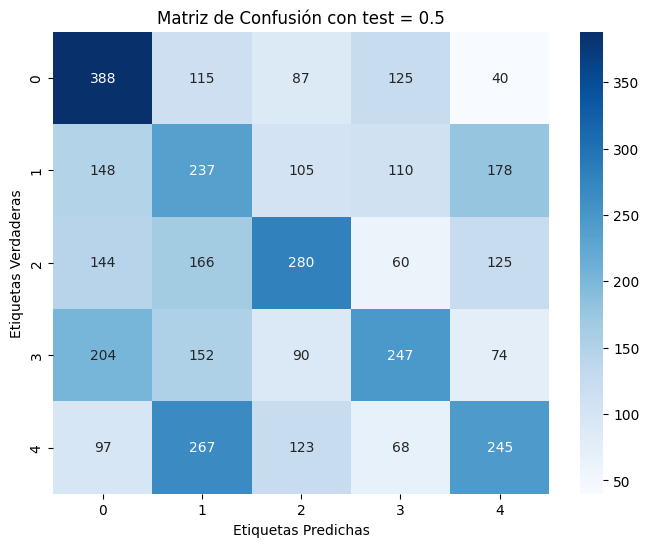

Exactitud del modelo: 0.36051612903225805
Precisión del modelo: 0.36614966981160846
Recall del modelo: 0.36051612903225805
Puntuación F1 del modelo: 0.35950037670612495
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.6.png


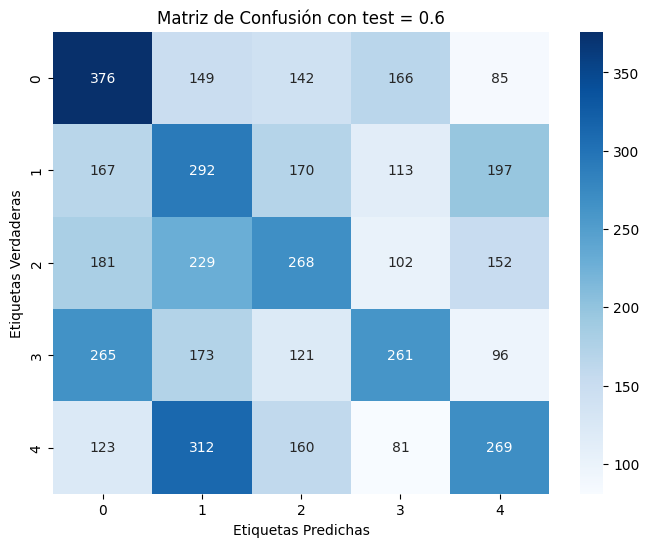

Exactitud del modelo: 0.31526881720430106
Precisión del modelo: 0.31972497009552486
Recall del modelo: 0.31526881720430106
Puntuación F1 del modelo: 0.31479838973492685
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.7.png


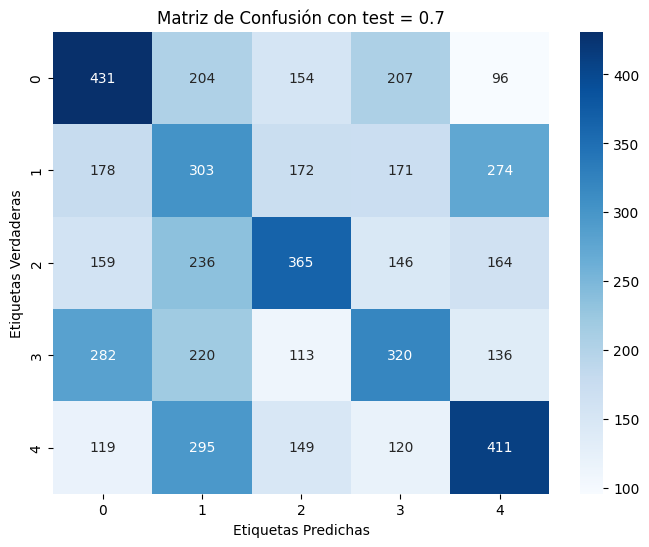

Exactitud del modelo: 0.33732718894009217
Precisión del modelo: 0.34070891395771585
Recall del modelo: 0.33732718894009217
Puntuación F1 del modelo: 0.33827402293292896
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.8.png


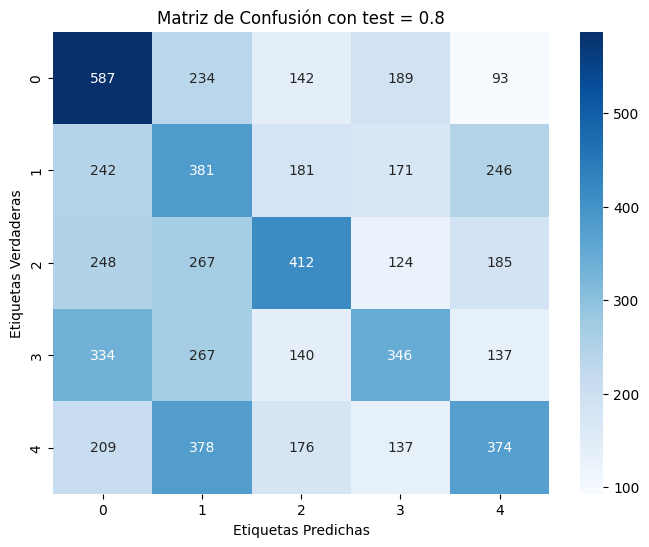

Exactitud del modelo: 0.3387096774193548
Precisión del modelo: 0.3449374072538431
Recall del modelo: 0.3387096774193548
Puntuación F1 del modelo: 0.3376397412643413
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/matriz_confusion_test_0.9.png


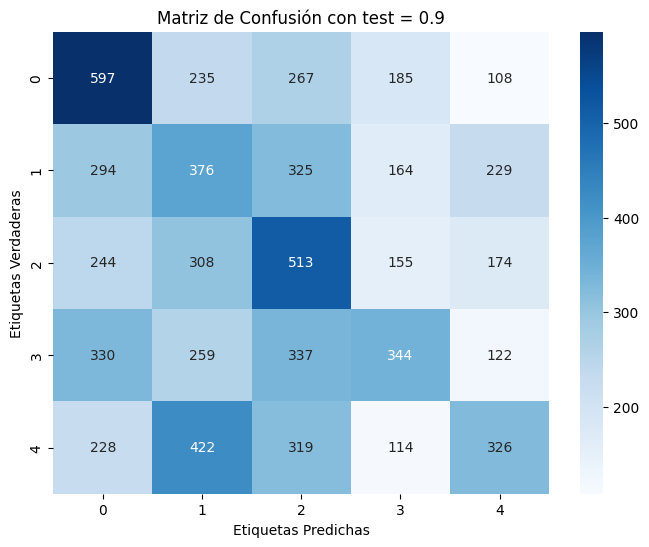

Exactitud del modelo: 0.30910394265232977
Precisión del modelo: 0.3153924381282687
Recall del modelo: 0.30910394265232977
Puntuación F1 del modelo: 0.3062636397090181
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_8_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_8_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_2.png


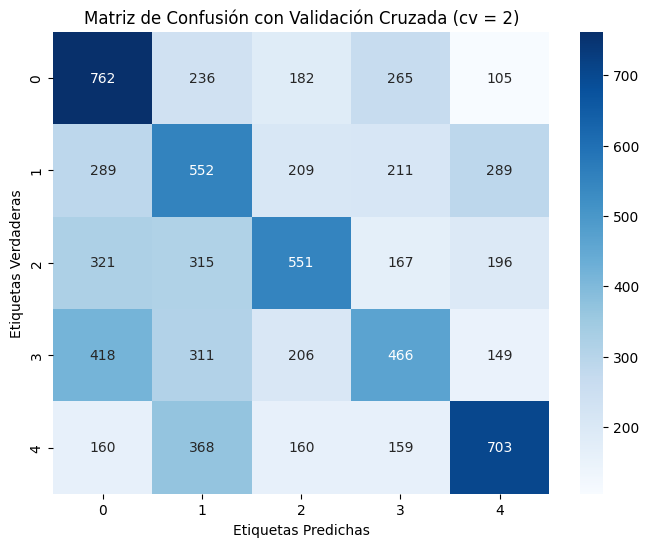

Exactitud media: 0.39148387096774195
Precisión media: 0.3953625173261483
Recall media: 0.39148387096774195
Puntuación F1 media: 0.390599246028962
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_3.png


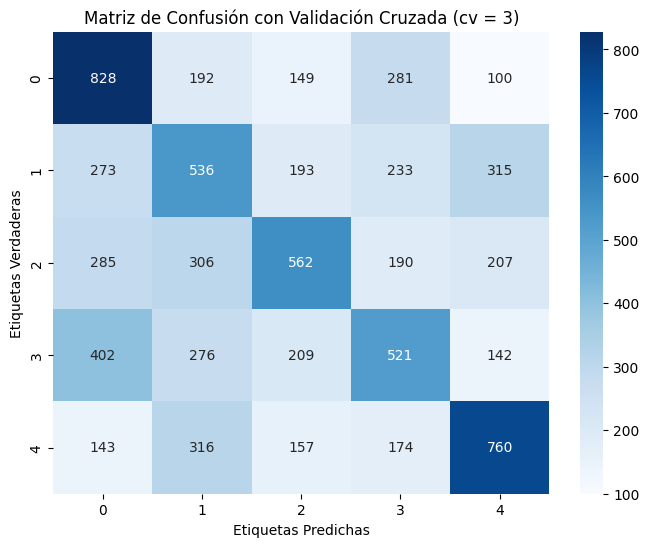

Exactitud media: 0.41380645161290325
Precisión media: 0.41441057605968823
Recall media: 0.41380645161290325
Puntuación F1 media: 0.41192965485122174
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_4.png


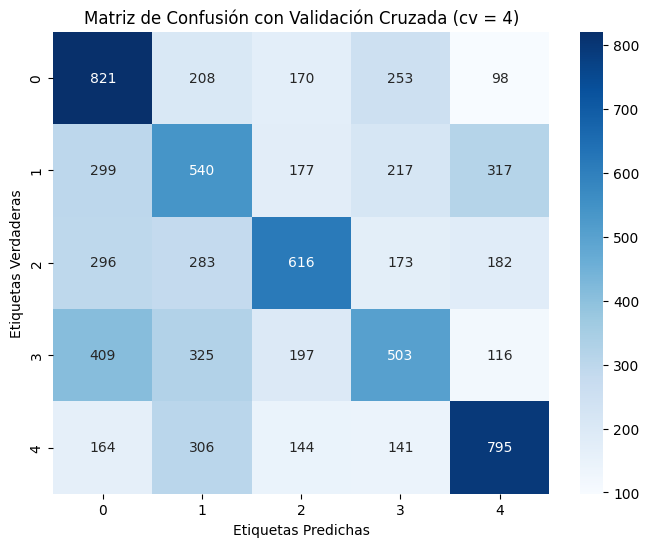

Exactitud media: 0.42258064516129035
Precisión media: 0.42561846827454686
Recall media: 0.42258064516129035
Puntuación F1 media: 0.42128688542122794
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_5.png


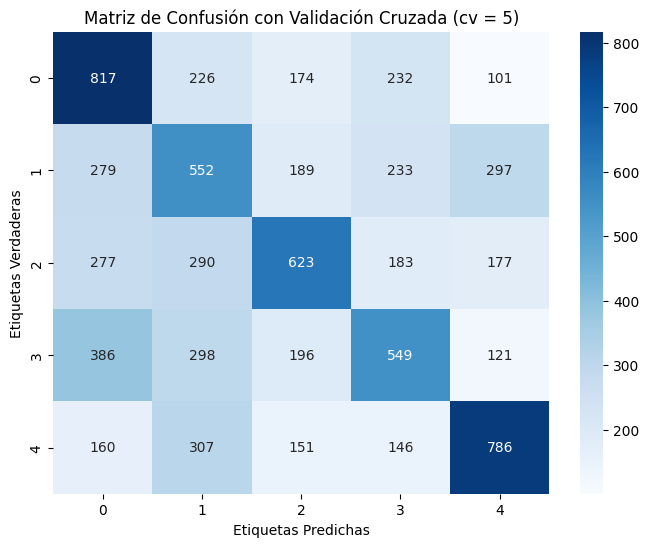

Exactitud media: 0.42929032258064515
Precisión media: 0.4324412584381079
Recall media: 0.42929032258064515
Puntuación F1 media: 0.42875245708182064
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_6.png


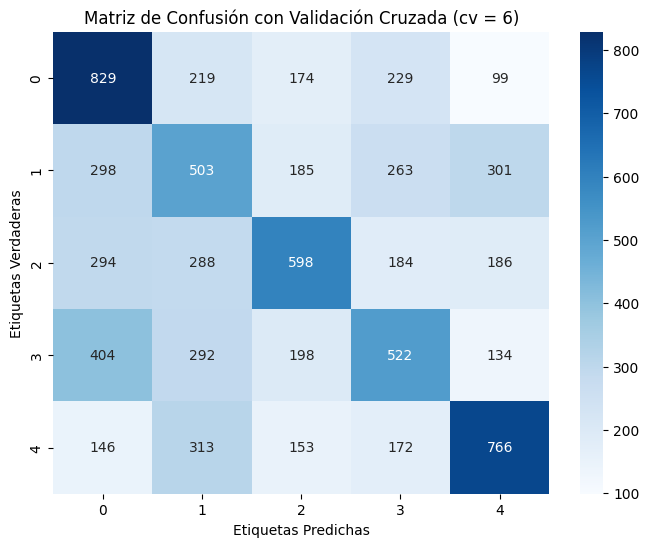

Exactitud media: 0.4152258064516129
Precisión media: 0.417148004823336
Recall media: 0.4152258064516129
Puntuación F1 media: 0.4138720975456984
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_7.png


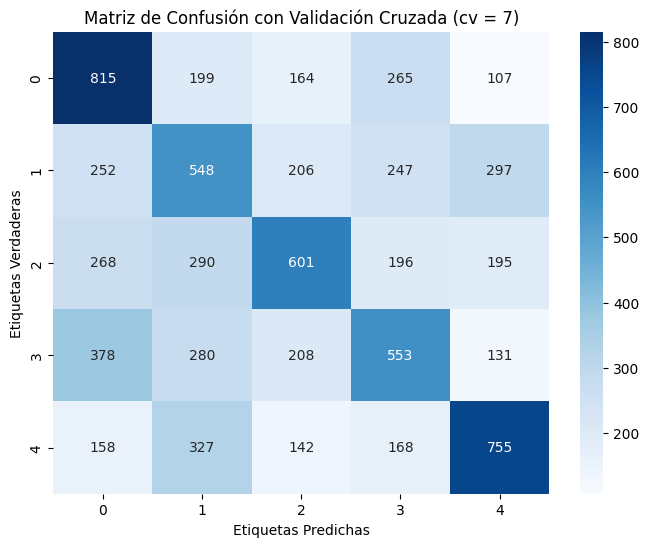

Exactitud media: 0.4221935483870968
Precisión media: 0.4238578098911113
Recall media: 0.4221935483870968
Puntuación F1 media: 0.4214152142849245
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_8.png


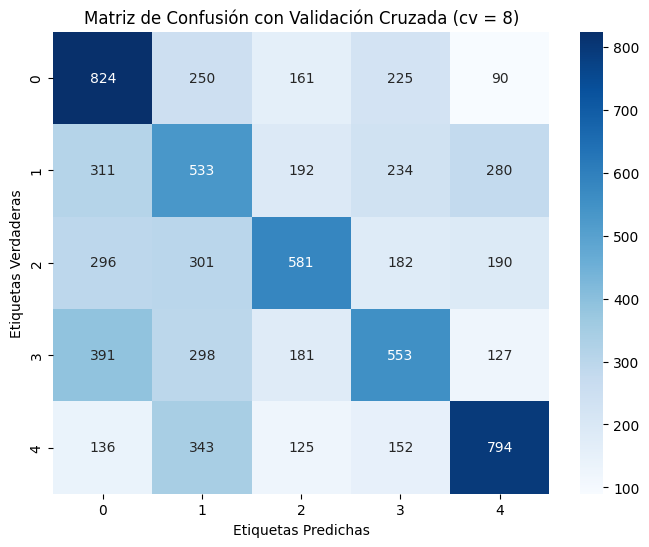

Exactitud media: 0.4238709677419355
Precisión media: 0.4290685356071564
Recall media: 0.4238709677419355
Puntuación F1 media: 0.4235185133208323
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_9.png


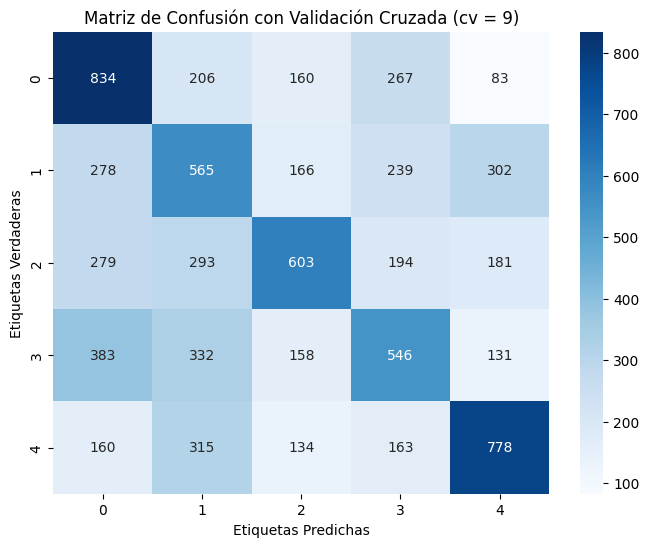

Exactitud media: 0.42916129032258066
Precisión media: 0.43405417009179453
Recall media: 0.42916129032258066
Puntuación F1 media: 0.4287850442229317
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_8_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/matriz_confusion_cv_10.png


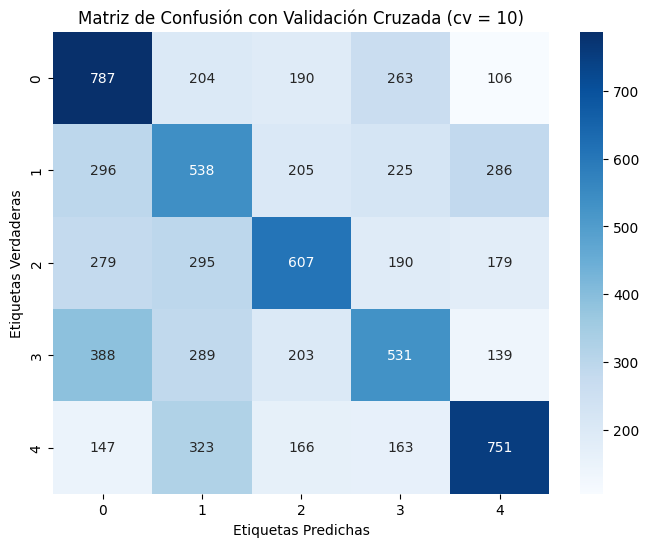

Exactitud media: 0.4147096774193548
Precisión media: 0.41698483273410686
Recall media: 0.4147096774193548
Puntuación F1 media: 0.4141764886502893
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_8_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.1.png


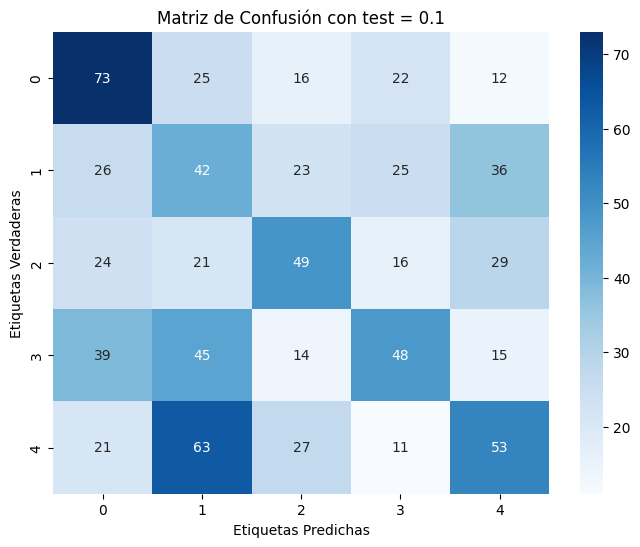

Exactitud del modelo: 0.3419354838709677
Precisión del modelo: 0.35060375365988794
Recall del modelo: 0.3419354838709677
Puntuación F1 del modelo: 0.3424291240492128
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.2.png


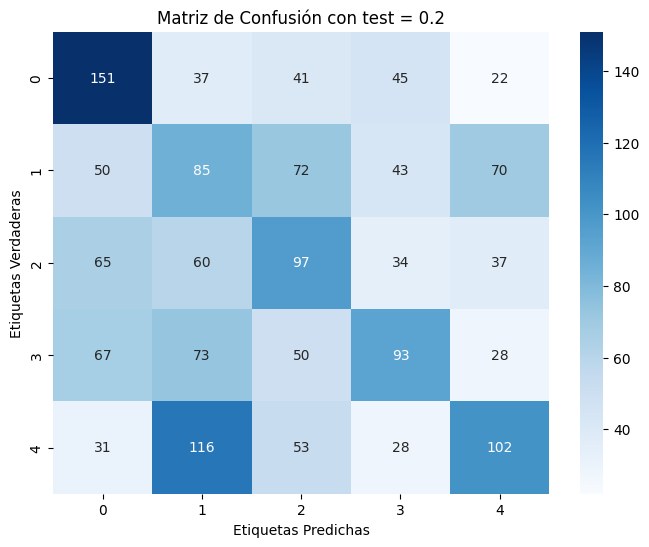

Exactitud del modelo: 0.3406451612903226
Precisión del modelo: 0.3457384328547951
Recall del modelo: 0.3406451612903226
Puntuación F1 del modelo: 0.3397923650851552
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.3.png


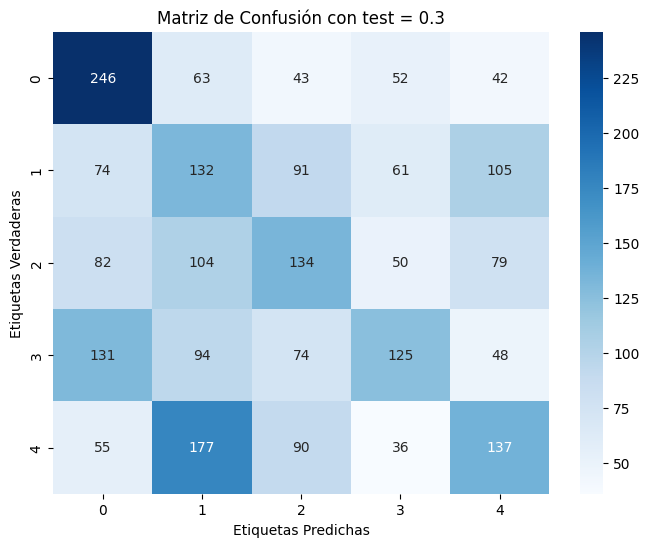

Exactitud del modelo: 0.3329032258064516
Precisión del modelo: 0.33556335610603
Recall del modelo: 0.3329032258064516
Puntuación F1 del modelo: 0.32906353875622485
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.4.png


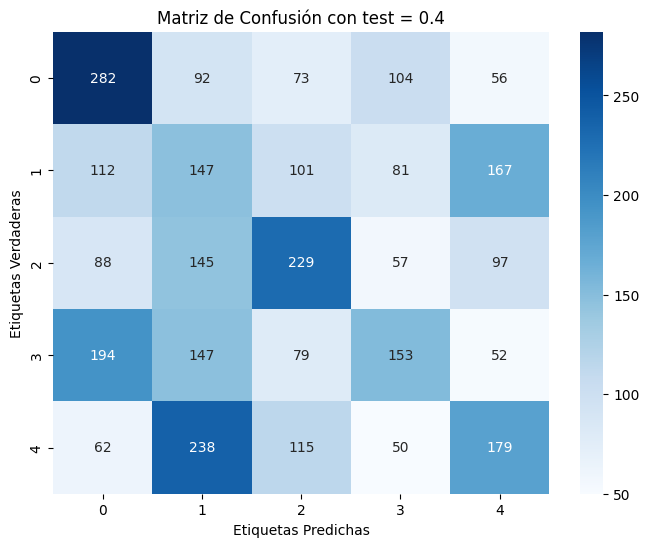

Exactitud del modelo: 0.3193548387096774
Precisión del modelo: 0.325340272703537
Recall del modelo: 0.3193548387096774
Puntuación F1 del modelo: 0.31890396815982325
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.5.png


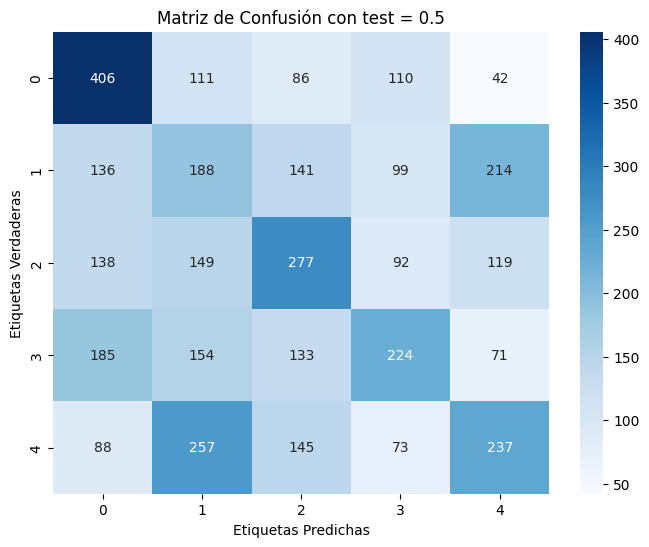

Exactitud del modelo: 0.34374193548387094
Precisión del modelo: 0.3435725098918503
Recall del modelo: 0.34374193548387094
Puntuación F1 del modelo: 0.3408562434036415
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.6.png


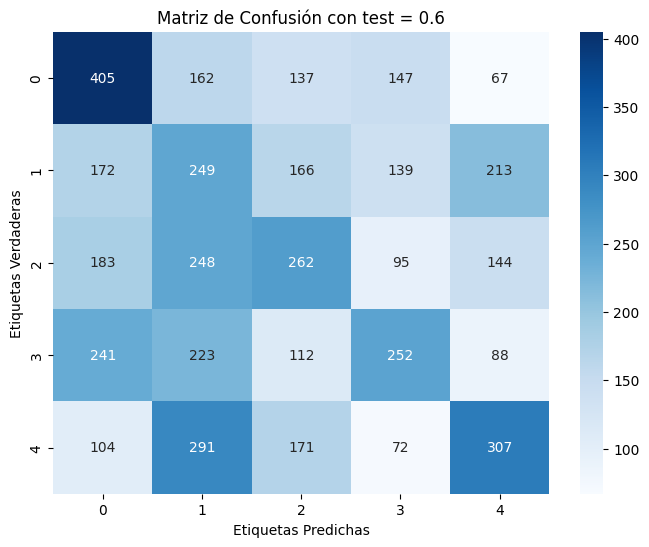

Exactitud del modelo: 0.3172043010752688
Precisión del modelo: 0.32374059789368426
Recall del modelo: 0.3172043010752688
Puntuación F1 del modelo: 0.3176493650517689
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.7.png


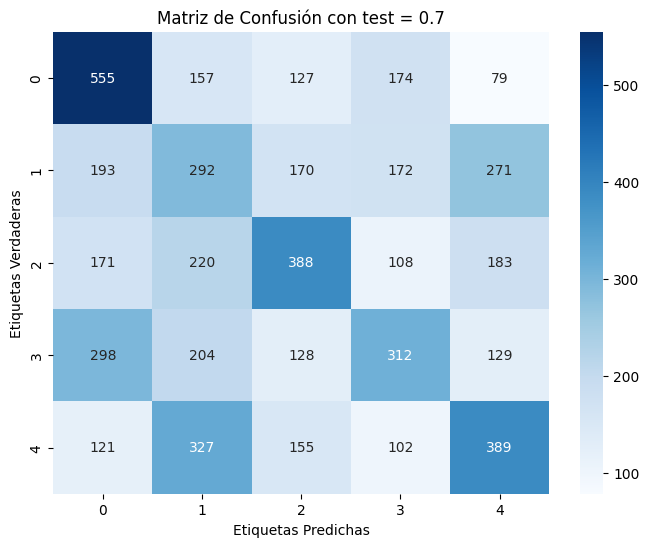

Exactitud del modelo: 0.3568663594470046
Precisión del modelo: 0.3574022118812541
Recall del modelo: 0.3568663594470046
Puntuación F1 del modelo: 0.3551586014201707
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.8.png


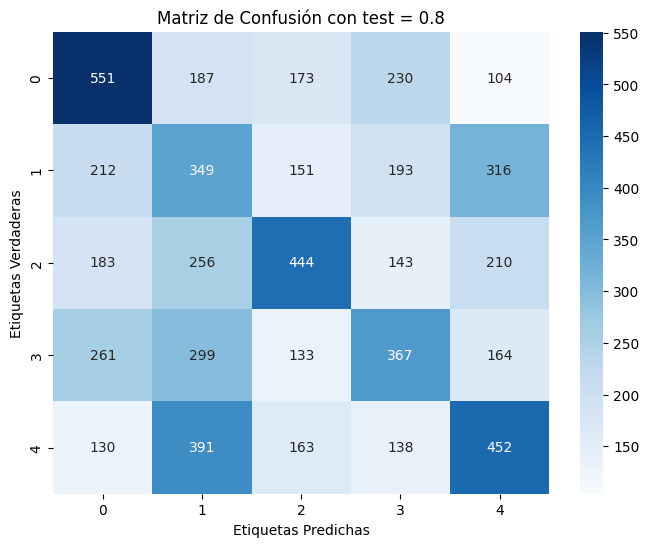

Exactitud del modelo: 0.3488709677419355
Precisión del modelo: 0.3545132280090916
Recall del modelo: 0.3488709677419355
Puntuación F1 del modelo: 0.35038069375915254
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/matriz_confusion_test_0.9.png


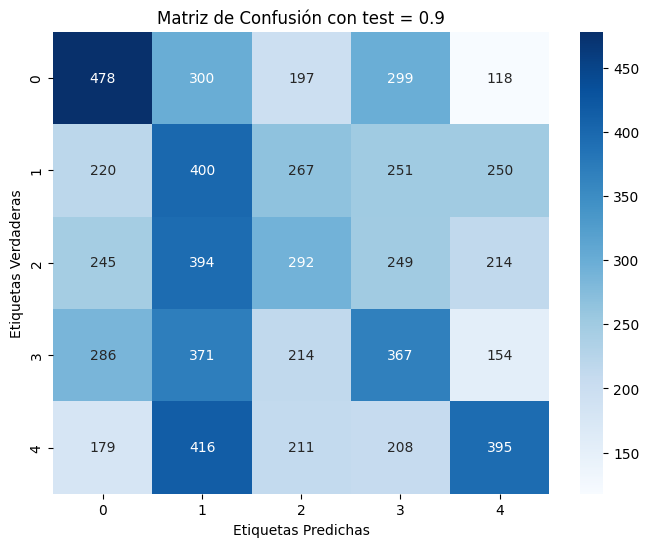

Exactitud del modelo: 0.27698924731182795
Precisión del modelo: 0.283339513107303
Recall del modelo: 0.27698924731182795
Puntuación F1 del modelo: 0.2779524974124776
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_9_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_9_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_2.png


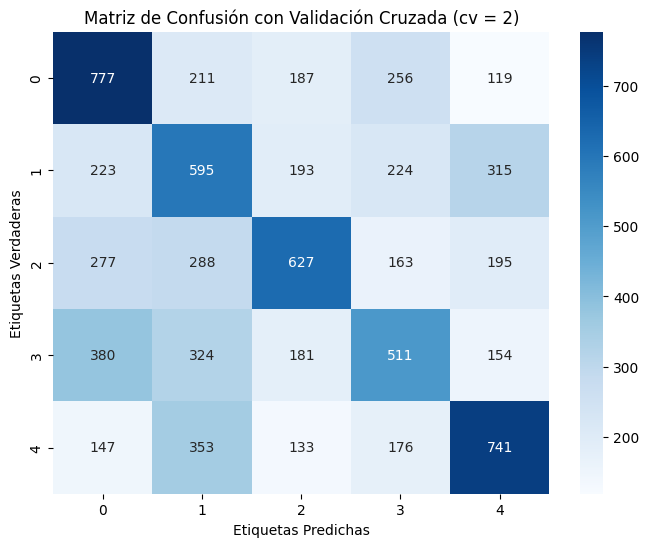

Exactitud media: 0.4194838709677419
Precisión media: 0.42234986729854346
Recall media: 0.4194838709677419
Puntuación F1 media: 0.4190807797386754
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_3.png


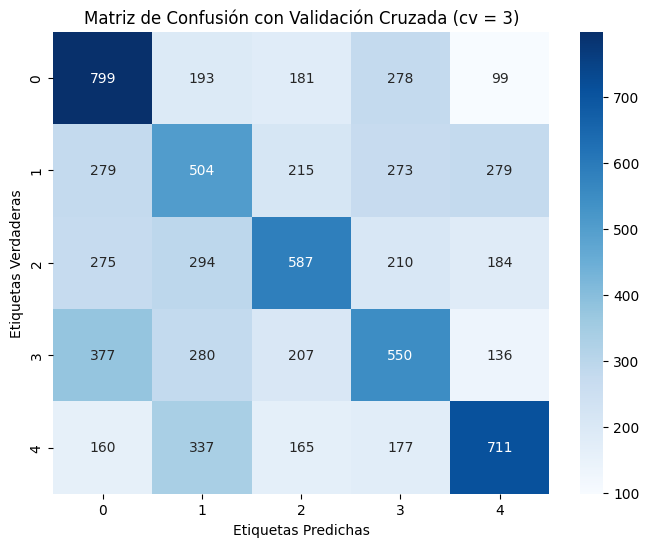

Exactitud media: 0.40658064516129033
Precisión media: 0.4087262694882371
Recall media: 0.40658064516129033
Puntuación F1 media: 0.4061006256802412
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_4.png


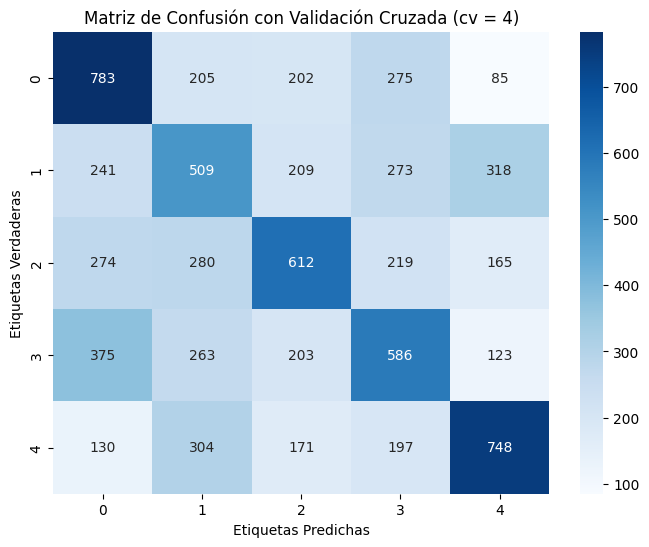

Exactitud media: 0.41780645161290325
Precisión media: 0.41926015528550425
Recall media: 0.41780645161290325
Puntuación F1 media: 0.4176348795744026
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_5.png


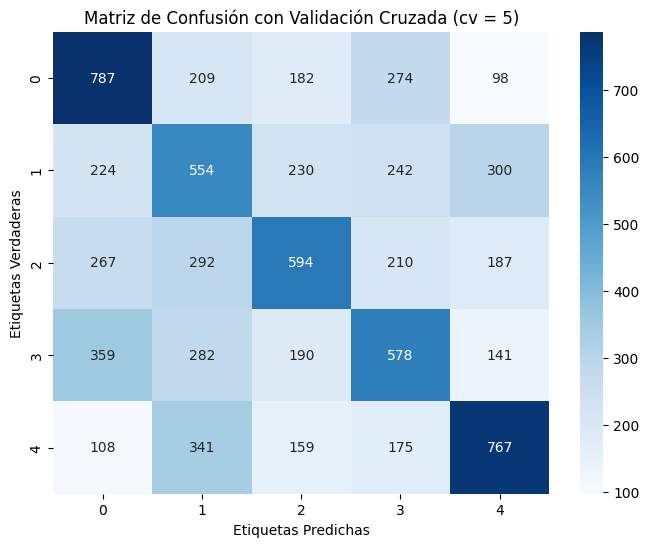

Exactitud media: 0.4232258064516129
Precisión media: 0.4248139073257488
Recall media: 0.4232258064516129
Puntuación F1 media: 0.42312840973410926
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_6.png


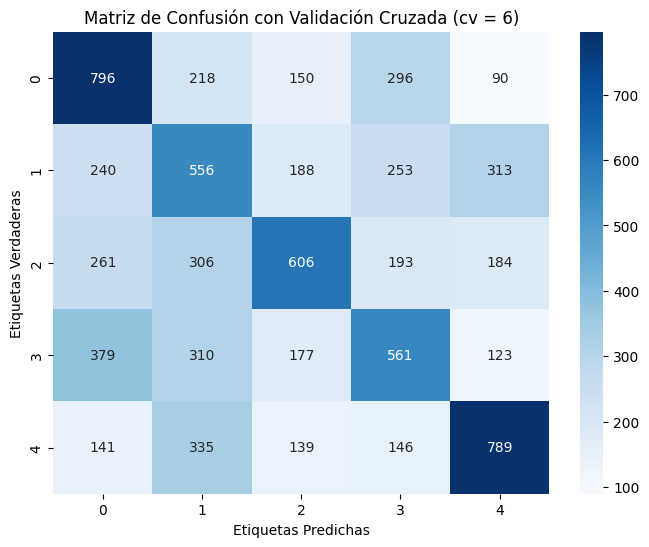

Exactitud media: 0.4268387096774194
Precisión media: 0.43097408765998096
Recall media: 0.4268387096774194
Puntuación F1 media: 0.42707092568139715
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_7.png


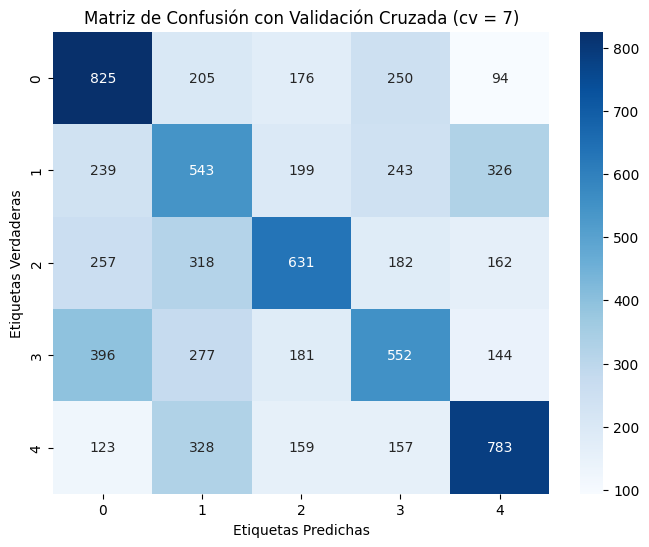

Exactitud media: 0.4301935483870968
Precisión media: 0.4319703452696906
Recall media: 0.4301935483870968
Puntuación F1 media: 0.4295743277692474
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_8.png


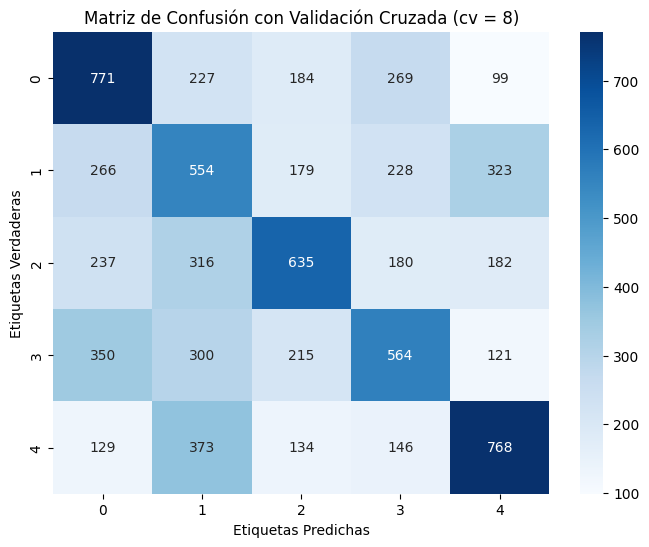

Exactitud media: 0.4247741935483871
Precisión media: 0.42905266573298484
Recall media: 0.4247741935483871
Puntuación F1 media: 0.42555964050596906
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_9.png


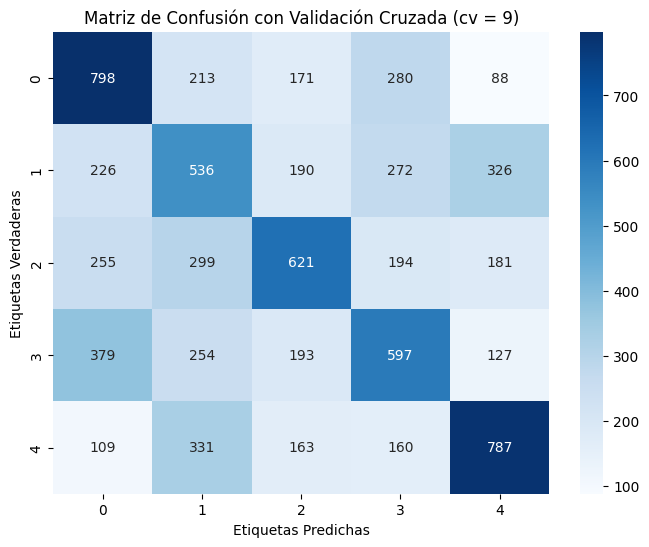

Exactitud media: 0.43083870967741933
Precisión media: 0.43254234913450096
Recall media: 0.43083870967741933
Puntuación F1 media: 0.43072804698636635
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_9_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/matriz_confusion_cv_10.png


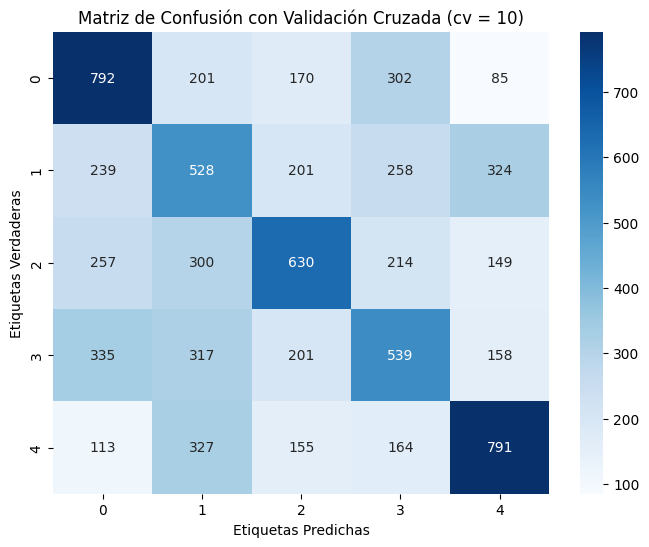

Exactitud media: 0.4232258064516129
Precisión media: 0.42517881927167017
Recall media: 0.4232258064516129
Puntuación F1 media: 0.42335112415503423
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_9_estimators/random_forest_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_sim_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.1.png


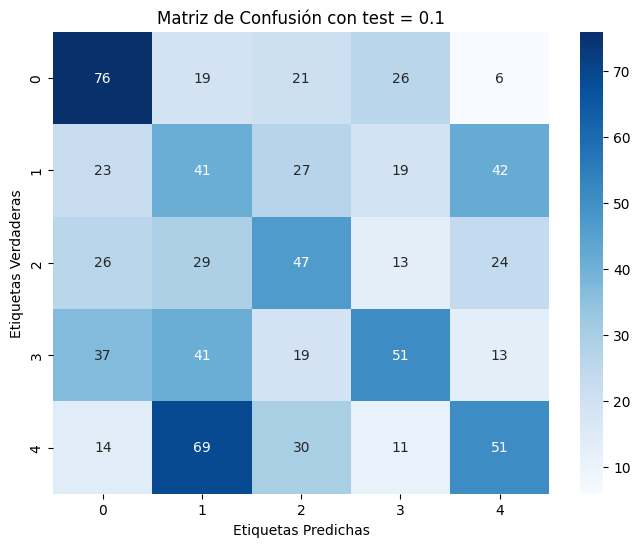

Exactitud del modelo: 0.3432258064516129
Precisión del modelo: 0.3543790056506056
Recall del modelo: 0.3432258064516129
Puntuación F1 del modelo: 0.34444962724373823
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.2.png


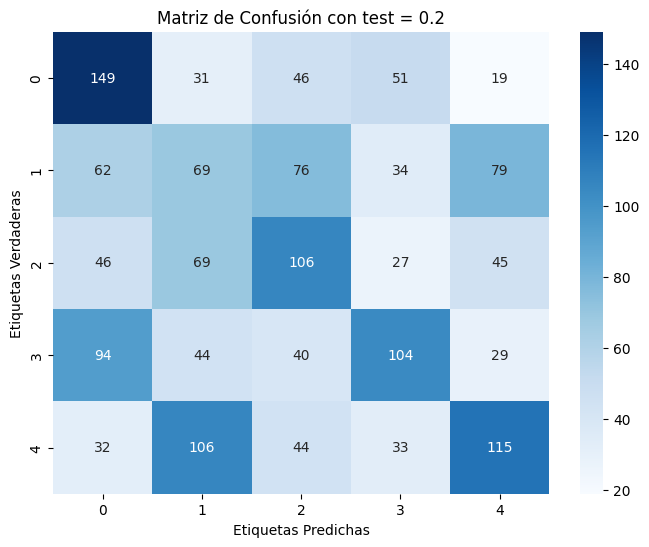

Exactitud del modelo: 0.3503225806451613
Precisión del modelo: 0.3522843659476202
Recall del modelo: 0.3503225806451613
Puntuación F1 del modelo: 0.34852684985412274
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.3.png


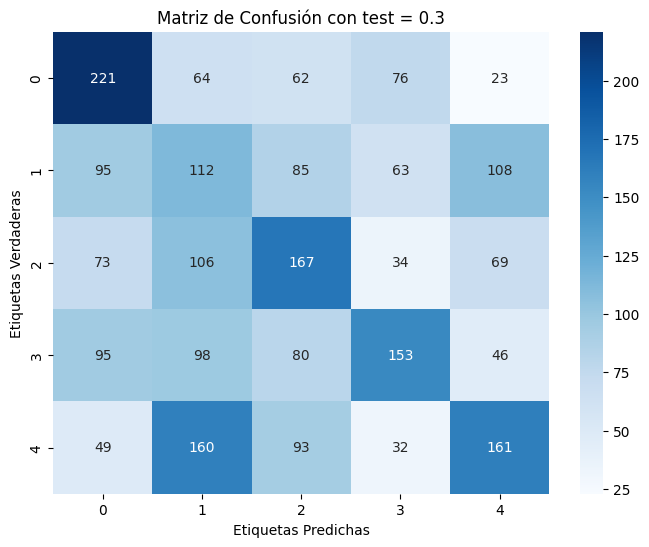

Exactitud del modelo: 0.3501075268817204
Precisión del modelo: 0.3580460814100815
Recall del modelo: 0.3501075268817204
Puntuación F1 del modelo: 0.3508405277432217
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.4.png


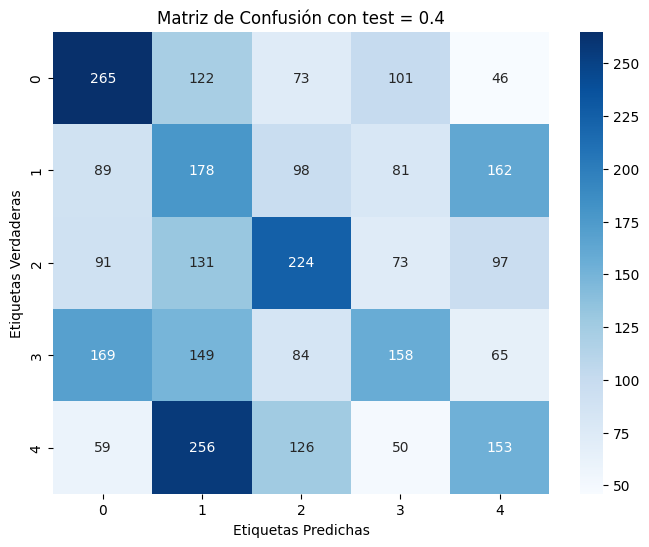

Exactitud del modelo: 0.31548387096774194
Precisión del modelo: 0.3220063879709758
Recall del modelo: 0.31548387096774194
Puntuación F1 del modelo: 0.3153671551185834
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.5.png


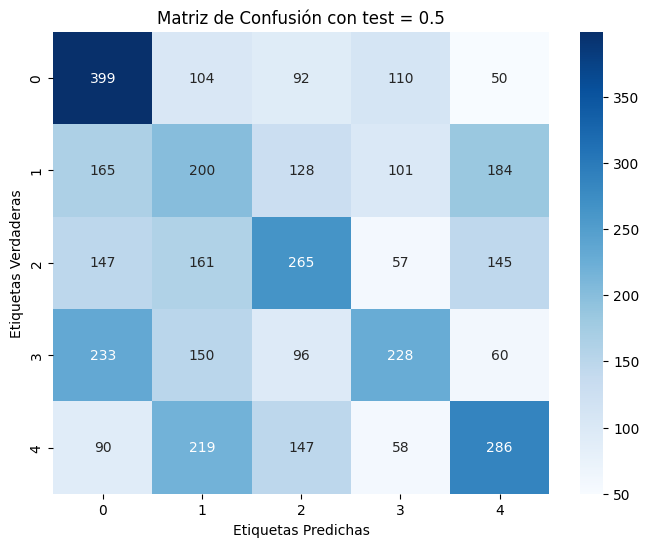

Exactitud del modelo: 0.35561290322580646
Precisión del modelo: 0.3590362774241974
Recall del modelo: 0.35561290322580646
Puntuación F1 del modelo: 0.3530173511078852
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.6.png


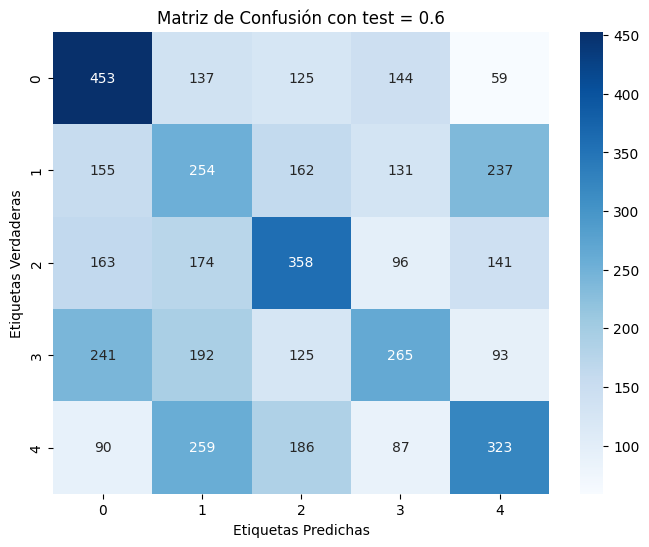

Exactitud del modelo: 0.3554838709677419
Precisión del modelo: 0.35585001005725936
Recall del modelo: 0.3554838709677419
Puntuación F1 del modelo: 0.3537449354166773
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.7.png


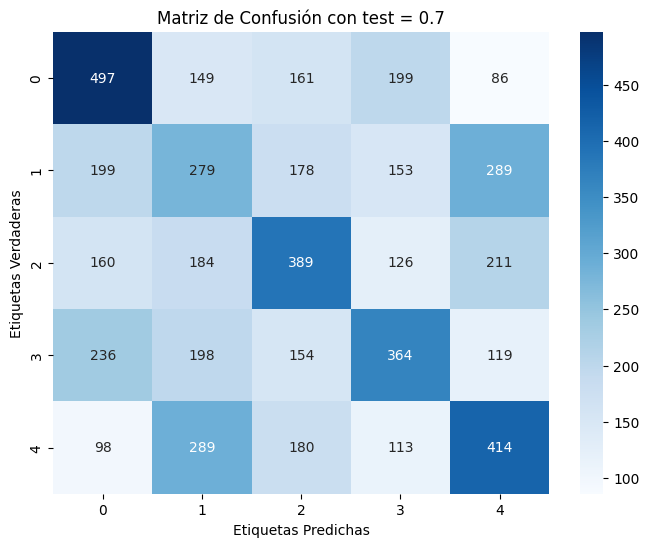

Exactitud del modelo: 0.3581566820276498
Precisión del modelo: 0.3575504744775537
Recall del modelo: 0.3581566820276498
Puntuación F1 del modelo: 0.3574476073035922
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.8.png


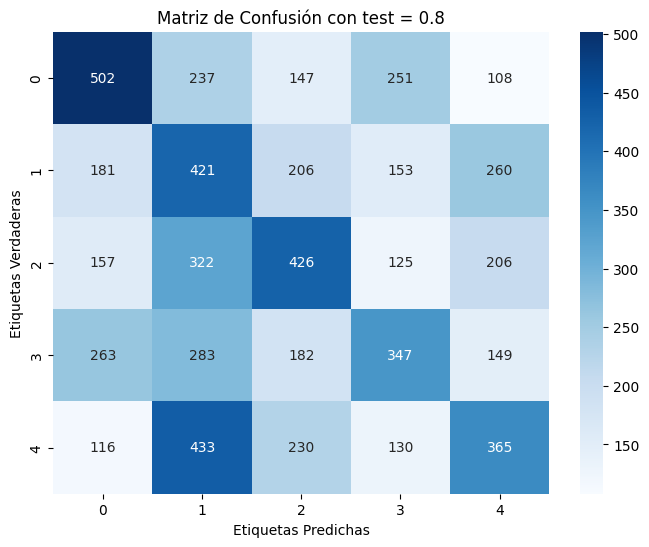

Exactitud del modelo: 0.33241935483870966
Precisión del modelo: 0.33991722503525174
Recall del modelo: 0.33241935483870966
Puntuación F1 del modelo: 0.333597622589403
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_sim_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/matriz_confusion_test_0.9.png


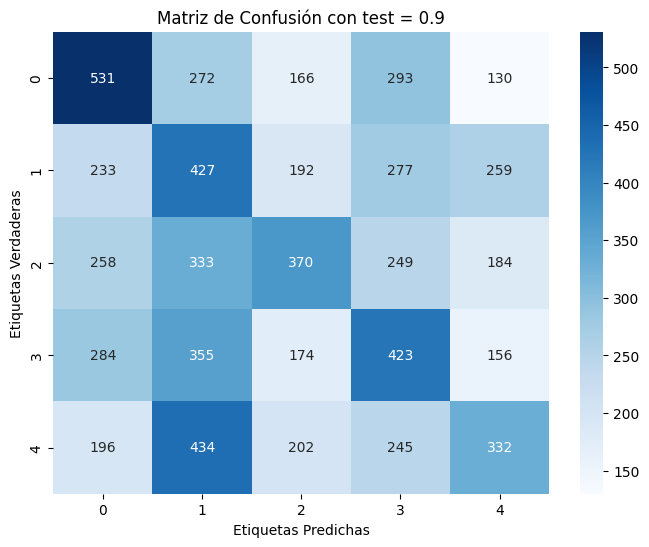

Exactitud del modelo: 0.29863799283154124
Precisión del modelo: 0.304177848369759
Recall del modelo: 0.29863799283154124
Puntuación F1 del modelo: 0.2983473220859962
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_sim_10_estimators/random_forest_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Se creó la carpeta Random_Forest_val_cruz_10_estimators en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_2.png


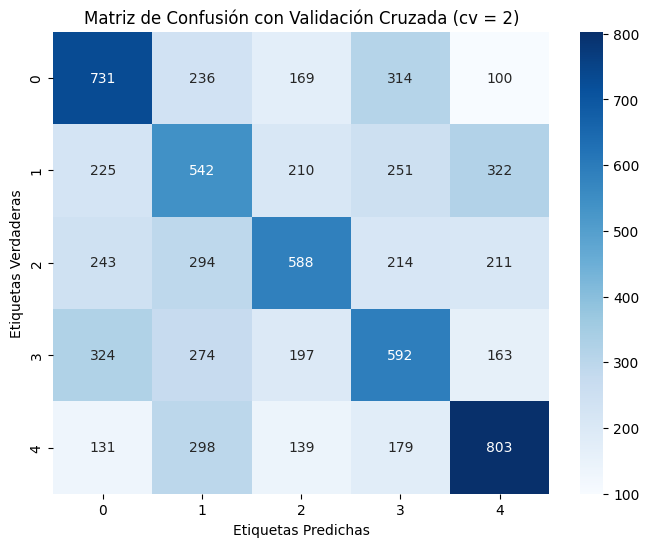

Exactitud media: 0.4201290322580645
Precisión media: 0.4214066492548957
Recall media: 0.4201290322580645
Puntuación F1 media: 0.41996546295180226
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_3.png


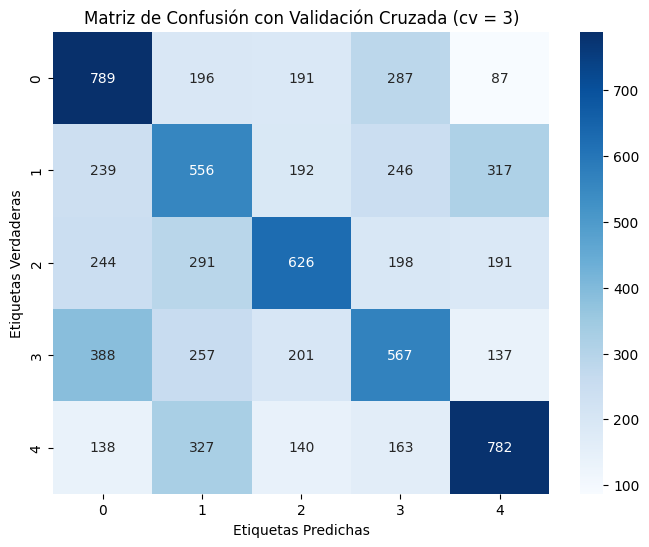

Exactitud media: 0.42838709677419357
Precisión media: 0.42977215316496475
Recall media: 0.42838709677419357
Puntuación F1 media: 0.42802579371742955
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_4.png


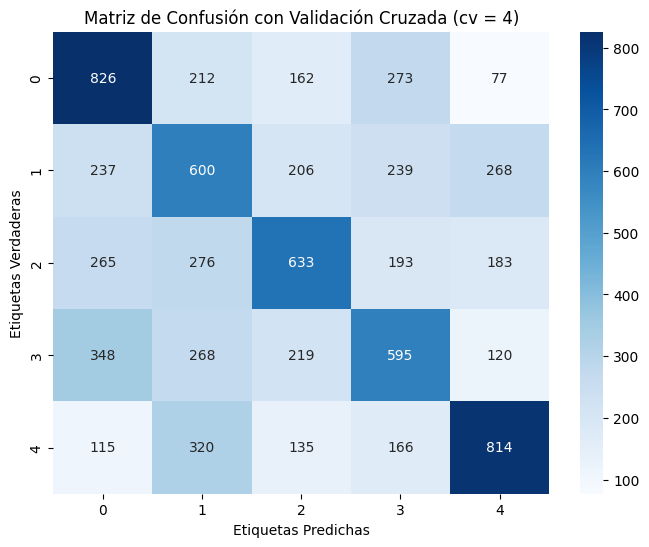

Exactitud media: 0.44748387096774195
Precisión media: 0.44979732204290235
Recall media: 0.44748387096774195
Puntuación F1 media: 0.44746154871458926
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_5.png


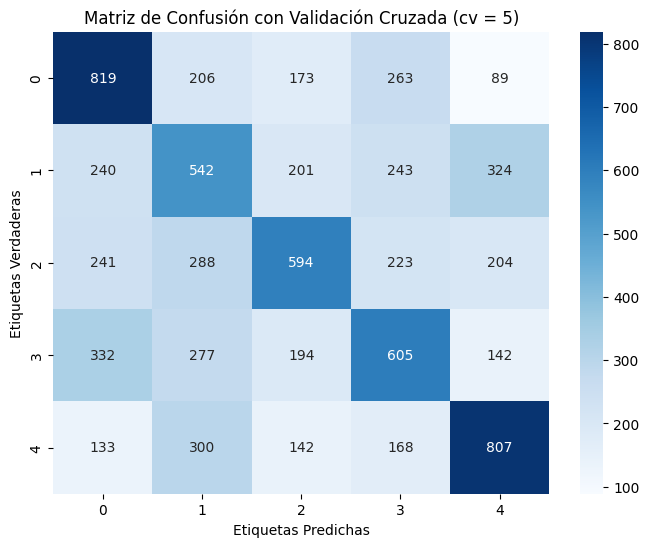

Exactitud media: 0.4344516129032258
Precisión media: 0.4347371832455457
Recall media: 0.4344516129032258
Puntuación F1 media: 0.4335042481661027
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_6.png


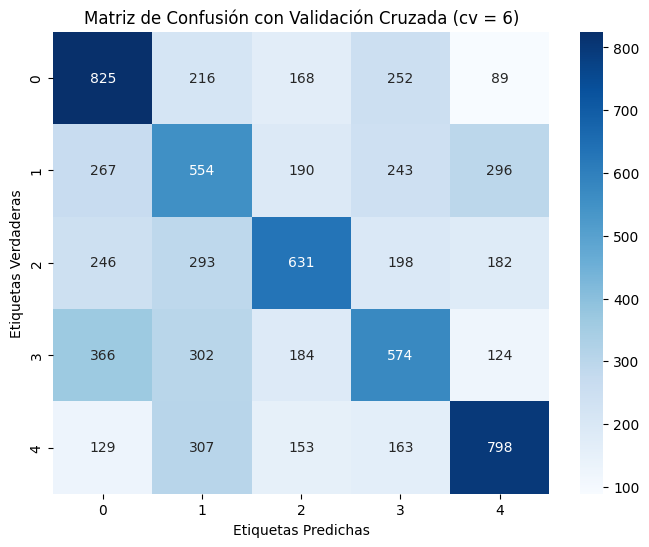

Exactitud media: 0.4363870967741936
Precisión media: 0.438923514365764
Recall media: 0.4363870967741936
Puntuación F1 media: 0.43616602292067086
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_7.png


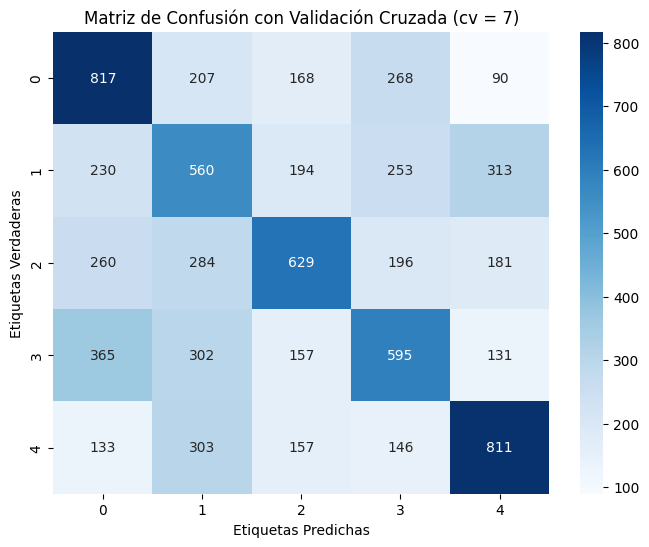

Exactitud media: 0.44025806451612903
Precisión media: 0.4424672459063718
Recall media: 0.44025806451612903
Puntuación F1 media: 0.4399859245608377
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_8.png


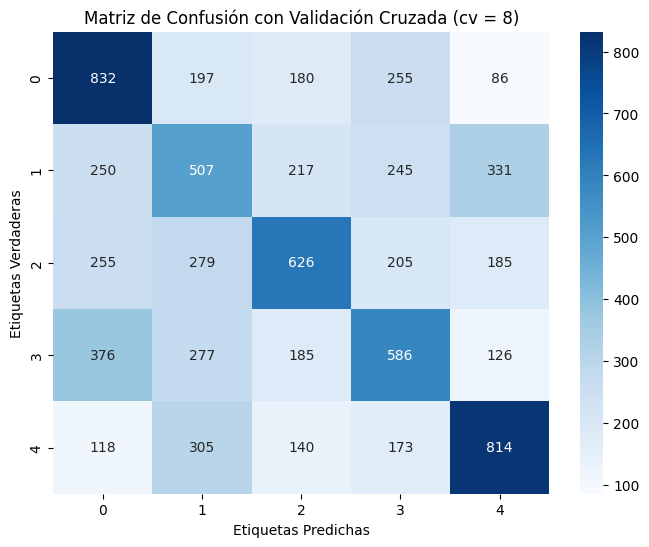

Exactitud media: 0.4341935483870968
Precisión media: 0.43418178878774244
Recall media: 0.4341935483870968
Puntuación F1 media: 0.43301558227940967
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_9.png


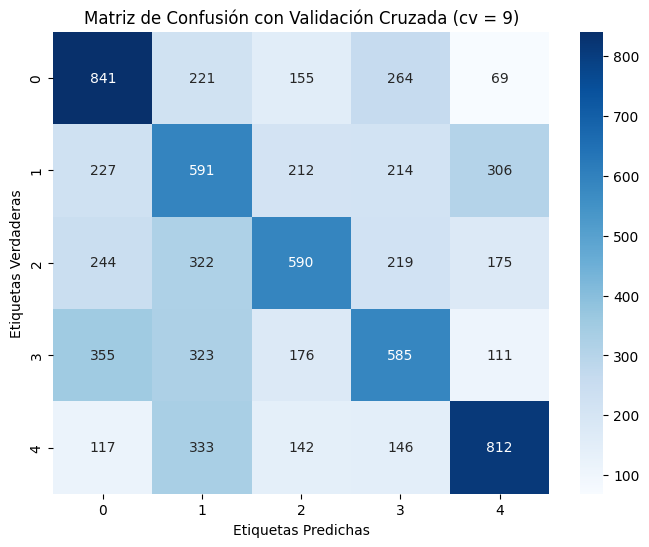

Exactitud media: 0.44116129032258067
Precisión media: 0.44504901153251725
Recall media: 0.44116129032258067
Puntuación F1 media: 0.4412372492927419
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
La carpeta Random_Forest_val_cruz_10_estimators ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\N_gramas_embeddings
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/matriz_confusion_cv_10.png


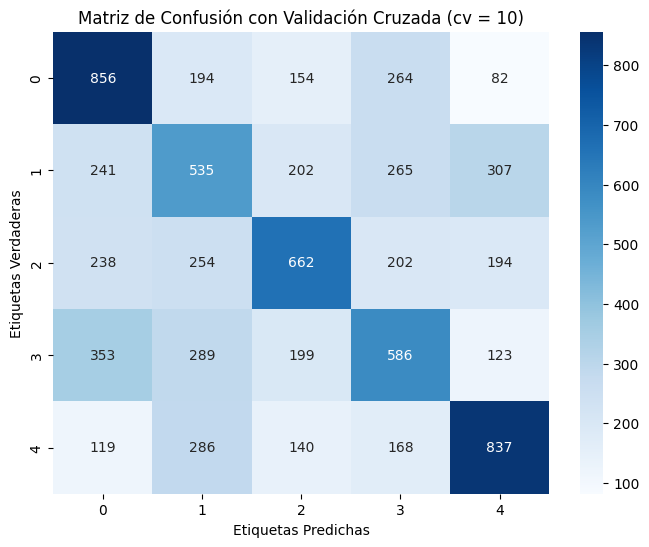

Exactitud media: 0.44851612903225807
Precisión media: 0.4484011380720127
Recall media: 0.44851612903225807
Puntuación F1 media: 0.44741758258154357
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/N_gramas_embeddings/Random_Forest_val_cruz_10_estimators/random_forest_val_cruz.json


In [24]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/random_forest_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/random_forest_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}
for h in range(3,11):
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = random_forest_classification(df_junto,h,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = random_forest_classification(df_junto,h,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)